# <h1>Thêm thư viện cần thiết</h1>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px

import plotly.subplots as sp
import plotly.graph_objects as go

import numpy as np
import joblib
import torch
import random

from transformers import AutoModel, AutoTokenizer


# <h1>Load dữ liệu file</h1>

In [11]:
df = pd.read_excel('data/DataFinal/model/QH2022S-Luong-Ha.xlsx', header = 1)
df.describe()

IDSV          CCCD         Phone  Maj    Province        ScID  \
count  9.280000e+02  9.260000e+02  9.280000e+02  0.0  926.000000  926.000000   
mean   2.200831e+07  2.008485e+10  6.692118e+08  NaN   13.976242   67.385529   
std    6.563862e+04  1.729995e+10  2.811013e+08  NaN   12.221358   70.410606   
min    2.001093e+07  1.224473e+08  8.122120e+07  NaN    1.000000    1.000000   
25%    2.201023e+07  1.304027e+09  3.666099e+08  NaN    1.000000   20.000000   
50%    2.201046e+07  2.230400e+10  8.274398e+08  NaN   15.000000   50.000000   
75%    2.201070e+07  3.430400e+10  9.477958e+08  NaN   25.000000   94.000000   
max    2.201093e+07  2.313040e+11  9.898620e+08  NaN   63.000000  900.000000   

           GraYear        DTUT       PTXT    ScoTHPT1  ...    K12_Ling  \
count   926.000000  174.000000  926.00000  908.000000  ...  897.000000   
mean   2021.828294    1.235632  110.74946    7.924593  ...    7.977703   
std       0.749557    1.029448   61.47743    1.142704  ...    0.692268   
min    2003.000000    1.000000  100.00000    0.000000  ...    0.800000   
25%    2022.000000    1.000000  100.00000    7.500000  ...    7.600000   
50%    2022.000000    1.000000  100.00000    8.000000  ...    8.000000   
75%    2022.000000    1.000000  100.00000    8.600000  ...    8.400000   
max    2022.000000    6.000000  501.00000    9.750000  ...   10.000000   

        K12_Flang    K12_Phys    K12_Chem     K12_Bio    K12_Hist    K12_Geog  \
count  891.000000  897.000000  897.000000  897.000000  897.000000  897.000000   
mean     7.771717    7.950910    7.987402    8.108138    8.292196    8.393311   
std      0.925826    0.869891    0.857847    0.754577    0.776902    0.657172   
min      4.400000    2.666667    5.000000    5.200000    0.600000    5.500000   
25%      7.100000    7.400000    7.500000    7.700000    7.800000    8.000000   
50%      7.800000    8.000000    8.000000    8.100000    8.400000    8.400000   
75%      8.500000    8.500000    8.600000    8.600000    8.800000    8.900000   
max      9.900000   10.000000   10.000000   10.000000   10.000000   10.000000   

          K12_AVG  Reason  Income  
count  900.000000     0.0     0.0  
mean     8.254333     NaN     NaN  
std      0.508518     NaN     NaN  
min      6.500000     NaN     NaN  
25%      7.900000     NaN     NaN  
50%      8.300000     NaN     NaN  
75%      8.600000     NaN     NaN  
max      9.800000     NaN     NaN  

[8 rows x 38 columns]

In [12]:
print(f"Số lượng cột: {len(df.columns)}")

Số lượng cột: 61


In [13]:
# 1. Tổng quan về dữ liệu
print("Tổng số dòng và cột trong dữ liệu:")
print(df.shape)

print("\nCác thuộc tính trong dữ liệu:")
print(df.columns)

print("\n5 dòng đầu tiên của dữ liệu:")
print(df.head())

# 2. Kiểm tra thông tin dữ liệu
print("\nThông tin chi tiết về dữ liệu:")
print(df.info())

# 3. Kiểm tra giá trị null
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# 4. Thống kê cơ bản
print("\nThống kê cơ bản của các thuộc tính số:")
print(df.describe())

# 5. Phân tích dữ liệu kiểu phân loại
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCác thuộc tính phân loại:")
print(categorical_cols)

print("\nPhân phối giá trị trong các thuộc tính phân loại:")
for col in categorical_cols:
    print(f"\nCột {col}:")
    print(df[col].value_counts())


Tổng số dòng và cột trong dữ liệu:
(928, 61)

Các thuộc tính trong dữ liệu:
Index(['IDSV', 'SBD', 'CCCD', 'Name', 'Sex', 'DOB', 'ETH', 'POB', 'Phone',
       'Univ', 'Year', 'Maj', 'GrMaj', 'Province', 'ScID', 'ScName', 'GraYear',
       'LocProv', 'LocDist', 'LocWard', 'DTUT', 'KVUT', 'PTXT', 'PTXTname',
       'Hoc_luc', 'Hanh_kiem', 'To_hop', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3',
       'ScoTHPT', 'OrderNV', 'DGNL1', 'DGNL2', 'DGNL3', 'ScoDGNL', 'LangCert',
       'TBC_Y1', 'TBC_Y2', 'TBC_Y3', 'TB_HK1', 'CN1', 'CN2', 'CN3', 'CN4',
       'CN5', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem',
       'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'Habit', 'Reason',
       'Sub_favor', 'Income', 'Fjob', 'Mjob'],
      dtype='object')

5 dòng đầu tiên của dữ liệu:
       IDSV       SBD          CCCD                   Name  Sex  \
0  22010001   1025364  1.204011e+09         NGUYỄN XUÂN AN  Nam   
1  22010002   1056731  1.304036e+09       ĐẶNG THỊ VÂN ANH   Nữ   
2  22010003  16

In [14]:
df.columns 

Index(['IDSV', 'SBD', 'CCCD', 'Name', 'Sex', 'DOB', 'ETH', 'POB', 'Phone',
       'Univ', 'Year', 'Maj', 'GrMaj', 'Province', 'ScID', 'ScName', 'GraYear',
       'LocProv', 'LocDist', 'LocWard', 'DTUT', 'KVUT', 'PTXT', 'PTXTname',
       'Hoc_luc', 'Hanh_kiem', 'To_hop', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3',
       'ScoTHPT', 'OrderNV', 'DGNL1', 'DGNL2', 'DGNL3', 'ScoDGNL', 'LangCert',
       'TBC_Y1', 'TBC_Y2', 'TBC_Y3', 'TB_HK1', 'CN1', 'CN2', 'CN3', 'CN4',
       'CN5', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem',
       'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'Habit', 'Reason',
       'Sub_favor', 'Income', 'Fjob', 'Mjob'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDSV       928 non-null    int64  
 1   SBD        928 non-null    object 
 2   CCCD       926 non-null    float64
 3   Name       928 non-null    object 
 4   Sex        928 non-null    object 
 5   DOB        928 non-null    object 
 6   ETH        926 non-null    object 
 7   POB        928 non-null    object 
 8   Phone      928 non-null    int64  
 9   Univ       928 non-null    object 
 10  Year       928 non-null    object 
 11  Maj        0 non-null      float64
 12  GrMaj      928 non-null    object 
 13  Province   926 non-null    float64
 14  ScID       926 non-null    float64
 15  ScName     926 non-null    object 
 16  GraYear    926 non-null    float64
 17  LocProv    926 non-null    object 
 18  LocDist    926 non-null    object 
 19  LocWard    286 non-null    object 
 20  DTUT      

- **IDSV**: Mã sinh viên.
- **SBD**: Số báo danh của sinh viên.
- **CCCD**: Số căn cước công dân của sinh viên.
- **Name**: Tên của sinh viên.
- **Sex**: Giới tính của sinh viên.
- **DOB**: Ngày sinh của sinh viên.
- **ETH**: Dân tộc của sinh viên.
- **POB**: Nơi sinh của sinh viên.
- **Phone**: Số điện thoại của sinh viên.
- **Univ**: Trường đại học mà sinh viên đang theo học.
- **Year**: Năm học hiện tại của sinh viên.
- **Maj**: Mã ngành học của sinh viên.
- **GrMaj**: Mã ngành học cụ thể (nếu có).
- **Province**: Mã tỉnh của sinh viên.
- **ScID**: Mã trường trung học phổ thông (THPT) của sinh viên.
- **ScName**: Tên trường THPT của sinh viên.
- **GraYear**: Năm tốt nghiệp THPT của sinh viên.
- **LocProv**: Tỉnh nơi sinh viên đăng ký hộ khẩu thường trú.
- **LocDist**: Quận/huyện nơi sinh viên đăng ký hộ khẩu thường trú.
- **LocWard**: Phường/xã nơi sinh viên đăng ký hộ khẩu thường trú.
- **DTUT**: Mã diện ưu tiên tuyển sinh của sinh viên (nếu có).
- **KVUT**: Mã khu vực ưu tiên tuyển sinh của sinh viên.
- **PTXT**: Mã phương thức xét tuyển vào đại học.
- **PTXTname**: Tên phương thức xét tuyển vào đại học.
- **Hoc_luc**: Học lực của sinh viên trong THPT.
- **Hanh_kiem**: Hạnh kiểm của sinh viên trong THPT.
- **To_hop**: Tổ hợp môn xét tuyển đại học.
- **ScoTHPT1**, **ScoTHPT2**, **ScoTHPT3**: Điểm của các môn trong tổ hợp xét tuyển đại học.
- **ScoTHPT**: Tổng điểm của các môn trong tổ hợp xét tuyển đại học.
- **OrderNV**: Số thứ tự nguyện vọng xét tuyển.
- **DGNL1**, **DGNL2**, **DGNL3**: Điểm các môn trong kỳ thi đánh giá năng lực (nếu có).
- **ScoDGNL**: Tổng điểm đánh giá năng lực.
- **LangCert**: Chứng chỉ ngoại ngữ (nếu có).
- **TBC_Y1**, **TBC_Y2**, **TBC_Y3**: Điểm trung bình chung các năm học 1, 2, 3 đại học.
- **TB_HK1**: Điểm trung bình học kỳ 1.
- **CN1**, **CN2**, **CN3**, **CN4**, **CN5**: Điểm các môn học năm thứ nhất đại học.
- **K12_Math**, **K12_Ling**, **K12_Flang**, **K12_Phys**, **K12_Chem**, **K12_Bio**, **K12_Hist**, **K12_Geog**, **K12_AVG**: Điểm các môn học lớp 12 và điểm trung bình lớp 12.
- **Habit**: Sở thích cá nhân của sinh viên.
- **Reason**: Lý do lựa chọn ngành học.
- **Sub_favor**: Môn học yêu thích.
- **Income**: Thu nhập của gia đình sinh viên.
- **Fjob**: Nghề nghiệp của cha sinh viên.
- **Mjob**: Nghề nghiệp của mẹ sinh viên.


In [16]:
def remove_rows_with_high_nan(df, threshold=0.5):
    # Thay thế các giá trị 'None' và 'nan' bằng np.nan
    df.replace(['None', 'nan', 'NaN', ' ',''], np.nan, inplace=True)
    
    # Tính tỷ lệ NaN trên mỗi hàng
    nan_ratio = df.isna().mean(axis=1)
    
    # Lọc các hàng có tỷ lệ NaN lớn hơn hoặc bằng ngưỡng
    filtered_df = df[nan_ratio < threshold]
    
    return filtered_df

In [17]:
df = remove_rows_with_high_nan(df)

In [18]:
#gom những cột có ý nghĩa với nhau lại:

# Tạo cột mới lưu giá trị của IDSV và SBD
df['Info_SV'] = df['IDSV'].astype(str) + '_' + df['SBD'].astype(str) + '_' + df['CCCD'].astype(str)+ '_' + df['DOB'].astype(str)+ '_' + df['Name'].astype(str)+ '_' + df['Phone'].astype(str)

df['highschool'] = df['ScID'].astype(str) + '_' + df['ScName'].astype(str)


# Xóa các cột không cần thiết cho dự đoán
df = df.drop(columns=['IDSV', 'SBD','CCCD','DOB','Name','Phone','ScName','ScID' ], errors='ignore')

In [19]:
def show_infor_dataframe(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
        print("\n")

In [20]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
['Nam' 'Nữ']


Column 'ETH' has 14 unique values:
['Kinh' 'Tày' 'Mường' 'Nùng' 'Khơmú' 'Dao' 'Thái' 'Sán Dìu' 'Hoa' 'Thổ'
 'Lào' 'Hmông' 'Kháng' 'Hà Nhì']


Column 'POB' has 39 unique values:
['HÀ NỘI' 'HÀ TÂY' 'VĨNH PHÚC' 'HẢI PHÒNG' 'TUYÊN QUANG' 'NINH BÌNH'
 'GIA LAI' 'NAM ĐỊNH' 'THANH HÓA' 'THÁI BÌNH' 'BẮC NINH' 'HÒA BÌNH'
 'NGHỆ AN' 'HÀ GIANG' 'HƯNG YÊN' 'PHÚ THỌ' 'HẢI DƯƠNG' 'HÀ NAM' 'SƠN LA'
 'TP HỒ CHÍ MINH' 'HÀ TĨNH' 'QUẢNG NINH' 'THÁI NGUYÊN' 'KON TUM'
 'BẮC GIANG' 'ĐIỆN BIÊN' 'LẠNG SƠN' 'BẮC KẠN' 'BÌNH DƯƠNG' 'CAO BẰNG'
 'YÊN BÁI' 'CẦN THƠ' 'ĐẮK LẮK' 'LAI CHÂU' 'LIÊN BANG NGA' 'HOÀ BÌNH'
 'THANH HOÁ' 'BÀ RỊA VŨNG TÀU' 'LÀO CAI']


Column 'Univ' has 1 unique values:
['Trường Đại học Giáo dục']


Column 'Year' has 1 unique values:
['QHS2022']


Column 'Maj' has 1 unique values:
[nan]


Column 'GrMaj' has 19 unique values:
['GD1.N1' 'GD1.N2' 'GD2.N1' 'GD2.N2' 'GD3.N1' 'GD3.N2' 'GD3.N3' 'GD3.N4'
 'GD3.N5' 'GD3.N6' 'GD3.N7' 'GD3.N8' 'GD3.N9' 'GD3

In [21]:
#xóa những cột không cần thiết vì chỉ có 1 giá trị
df = df.drop(columns=['Univ', 'Year'], errors='ignore')
#xóa những cột không cần thiết vì đã có cột đại diện cho ý nghĩa của cột đã xóa
df = df.drop(columns=['OrderNV','POB', 'Province', 'LocProv','LocDist', 'Info_SV','highschool' ], errors='ignore')

In [22]:
def display_column_info(df):
    for column in df.columns:
        # Kiểu dữ liệu của cột
        col_type = df[column].dtype
        
        # Số lượng giá trị không bị thiếu
        non_null_count = df[column].notna().sum()
        
        # Tổng số giá trị
        total_count = len(df[column])
        
        # Tính số lượng và tỷ lệ phần trăm giá trị thiếu
        missing_count = total_count - non_null_count
        missing_percentage = (missing_count / total_count) * 100
        
        
        print(f"Column: {column}")
        print(f"  Data Type: {col_type}")
        print(f"  Non-null Count: {non_null_count}")
        print(f"  Total Count: {total_count}")
        print(f"  Missing Values Count: {missing_count}")
        print(f"  Missing Values Percentage: {missing_percentage:.2f}%")
        print()
        # Kiểm tra xem tỷ lệ giá trị thiếu có cao không
        if missing_percentage >= 50:
            print(f"  Column {column} có {missing_percentage:.2f}% giá trị bị thiếu nhiều, cần xóa")
        print()
        print()

In [23]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Maj
  Data Type: float64
  Non-null Count: 0
  Total Count: 926
  Missing Values Count: 926
  Missing Values Percentage: 100.00%

  Column Maj có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: GrMaj
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: LocWard
  Data Type: object
  Non-null Count: 286
  Total Count: 926
  Missing Values Count: 640
  Missing Values Percentage: 69.11%

  Column LocWard có 69.11% giá trị bị thiếu nhiều, cần xóa


Column: DTUT
  Data Type: float64
  Non-null C

In [24]:
#xóa những cột thiếu dữ liệu nhiều
df = df.drop(columns=['Maj', 'LocWard','DTUT','DGNL1','DGNL2','DGNL3','ScoDGNL','LangCert',
                      'TBC_Y1','TBC_Y2','TBC_Y3','CN3','CN4', 'CN5','Reason','Sub_favor',
                      'Income' ], errors='ignore')

In [25]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [26]:
# Lọc các hàng có giá trị 'Hoc_luc' là NaN
null_hoc_luc_df = df[df['Hoc_luc'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị học lực là NaN:")
    print(null_hoc_luc_df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT','K12_Math','K12_Ling', 'K12_Phys','K12_AVG']])  # Sửa phần này
else:
    print("Không có dữ liệu nào có giá trị học lực là NaN.")


Dữ liệu có giá trị học lực là NaN:
    Hoc_luc Hanh_kiem  ScoTHPT1  ScoTHPT2  ScoTHPT3  ScoTHPT  K12_Math  \
149     NaN       NaN       NaN       NaN       NaN    30.00       6.8   
153     NaN       NaN       NaN       NaN       NaN    30.00       7.1   
154     NaN       NaN       NaN       NaN       NaN    30.00       6.7   
156     NaN       NaN       NaN       NaN       NaN    30.00       8.2   
174     NaN       NaN      8.75      8.75      8.25    28.50       6.6   
205     NaN       NaN      7.75      9.75      9.00    29.25       8.5   
341     NaN       NaN      7.75      7.00      7.50    24.50       8.3   
614     NaN       NaN      8.50      6.75      8.25    26.25       8.4   
673     NaN       NaN      7.00      7.25      8.25    25.25       8.0   
777     NaN       NaN       NaN       NaN       NaN    30.00       7.5   
778     NaN       NaN      8.75      9.50      8.00    29.00       7.6   
791     NaN       NaN      9.00     10.00      9.50    31.25       7.1   
799

In [27]:
def remove_rows_with_specific_values(df):
    # Thay thế các giá trị 'None' và 'nan' bằng np.nan
    df.replace(['None', 'nan', 'NaN'], np.nan, inplace=True)
    
    # Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
    condition_nan_columns = df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']].isna().all(axis=1)
    
    # Điều kiện kiểm tra giá trị cụ thể trong cột 'ScoTHPT'
    condition_specific_value = df['ScoTHPT'] == 30.00
    
    # Kết hợp các điều kiện để lọc các dòng cần xóa
    rows_to_remove = condition_nan_columns & condition_specific_value
    # Xóa các dòng dữ liệu phù hợp
    df_cleaned = df[~rows_to_remove]
    
    return df_cleaned

In [28]:
df= remove_rows_with_specific_values(df)

In [29]:
df.columns

Index(['Sex', 'ETH', 'GrMaj', 'GraYear', 'KVUT', 'PTXT', 'PTXTname', 'Hoc_luc',
       'Hanh_kiem', 'To_hop', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT',
       'TB_HK1', 'CN1', 'CN2', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys',
       'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'Habit',
       'Fjob', 'Mjob'],
      dtype='object')

In [30]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [31]:
# Lọc các hàng có giá trị 'Hoc_luc' là NaN
null_hoc_luc_df = df[df['Hoc_luc'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị học lực là NaN:")
    print(null_hoc_luc_df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT','K12_Math','K12_Ling', 'K12_Phys','K12_AVG']])  # Sửa phần này
else:
    print("Không có dữ liệu nào có giá trị học lực là NaN.")

Dữ liệu có giá trị học lực là NaN:
    Hoc_luc Hanh_kiem  ScoTHPT1  ScoTHPT2  ScoTHPT3  ScoTHPT  K12_Math  \
174     NaN       NaN      8.75      8.75      8.25    28.50       6.6   
205     NaN       NaN      7.75      9.75      9.00    29.25       8.5   
341     NaN       NaN      7.75      7.00      7.50    24.50       8.3   
614     NaN       NaN      8.50      6.75      8.25    26.25       8.4   
673     NaN       NaN      7.00      7.25      8.25    25.25       8.0   
778     NaN       NaN      8.75      9.50      8.00    29.00       7.6   
791     NaN       NaN      9.00     10.00      9.50    31.25       7.1   
802     NaN       NaN      8.50      9.00      8.50    28.75       7.2   
807     NaN       NaN      8.50      8.75      9.75    29.75       NaN   
818     NaN       NaN      7.50      9.75      9.00    29.00       8.0   
825     NaN       NaN      8.00      9.00      9.00    28.75       7.0   
827     NaN       NaN      8.25     10.00      8.75    29.75       7.7   
836

In [32]:
def count_rows_with_text(df, column_name, text):
    # Kiểm tra sự tồn tại của chuỗi trong cột và tính số lượng dòng
    count = df[column_name].str.contains(text, na=False).sum()
    return count

In [33]:
count = count_rows_with_text(df, 'PTXTname', 'ĐGNL')
print(f"Số lượng dòng chứa '{'ĐGNL'}' trong cột 'PTXTname': {count}")

count1 = count_rows_with_text(df, 'PTXTname', 'TN THPT')
print(f"Số lượng dòng chứa '{'TN THPT'}' trong cột 'PTXTname': {count1}")


Số lượng dòng chứa 'ĐGNL' trong cột 'PTXTname': 6
Số lượng dòng chứa 'TN THPT' trong cột 'PTXTname': 909


In [34]:
# Lọc các hàng có giá trị 'ScoTHPT' là NaN
null_hoc_luc_df = df[df['ScoTHPT'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị ScoTHPT là NaN:")
    print(null_hoc_luc_df[['ScoTHPT', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'PTXT','PTXTname','TB_HK1', 'K12_Math']])
else:
    print("Không có dữ liệu nào có giá trị ScoTHPT là NaN.")

Dữ liệu có giá trị ScoTHPT là NaN:
     ScoTHPT  ScoTHPT1  ScoTHPT2  ScoTHPT3   PTXT PTXTname  TB_HK1  K12_Math
15       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.86       8.9
39       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.67       9.7
98       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.79       9.0
127      NaN       NaN       NaN       NaN  401.0     ĐGNL    3.11       9.1
129      NaN       NaN       NaN       NaN  401.0     ĐGNL    2.78       9.4
346      NaN       NaN       NaN       NaN  401.0  TN THPT    2.75       9.1
483      NaN       NaN       NaN       NaN  401.0  TN THPT    2.57       7.2
851      NaN       NaN       NaN       NaN  401.0     ĐGNL    3.70       9.8


In [35]:
# Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
condition_nan_columns = df[['ScoTHPT', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']].isna().all(axis=1)

# Điều kiện kiểm tra giá trị cụ thể trong cột 'PTXT'
condition_specific_value = df['PTXT'] == 401.0

# Kết hợp các điều kiện để lọc các dòng cần xóa
rows_to_remove = condition_nan_columns & condition_specific_value
# Xóa các dòng dữ liệu phù hợp
df = df[~rows_to_remove]

In [36]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [37]:
# Lọc các hàng có giá trị 'K12_AVG' là NaN
null_hoc_luc_df = df[df['K12_AVG'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị K12_AVG là NaN:")
    print(null_hoc_luc_df[['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                           'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']])
else:
    print("Không có dữ liệu nào có giá trị K12_AVG là NaN.")

Dữ liệu có giá trị K12_AVG là NaN:
     K12_Math  K12_Ling  K12_Flang  K12_Phys  K12_Chem  K12_Bio  K12_Hist  \
70        NaN       NaN        NaN       NaN       NaN      NaN       NaN   
219       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
265       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
275       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
315       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
321       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
337       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
339       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
375       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
394       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
491       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
513       NaN       NaN        NaN       

In [38]:
# Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
condition_nan_columns = df[['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']].isna().all(axis=1)
# Xóa các dòng dữ liệu phù hợp
df = df[~condition_nan_columns]

In [39]:
k12_columns = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

# Điền vào giá trị còn thiếu bằng giá trị trung bình của cột
for col in k12_columns:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

C:\Users\vongu\AppData\Local\Temp\ipykernel_20284\162960753.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


# <h1>Chuyển hóa số liệu</h1>

**ta chuyển hóa dữ liệu về dạng số để thực hiện trực quan hóa số liệu:**
- `Sex` : (numeric: "1" - "Nữ" or "0" - Nam)
- `ETH` : (numeric: "1" - "Kinh" or "0" - "Không phải dân tộc kinh")
- `GrMaj` :gom thành các nhóm ngành chính sau đó label encoder và lưu lại model (GrMaj_labelencoder.pkl)
- `GraYear` : (label encoder) (GraYear_labelencoder.pkl)
- `KVUT` : (numeric: "0" - "1" or "1" - "2" or "2" - "2NT" or "3" - "3")
- `PTXT` : (label encoder) (PTXT_labelencoder.pkl)
- `PTXTname` : (label encoder) (PTXTname_labelencoder.pkl)
- `Hoc_luc` : (numeric: "0" - "Giỏi" or "1" - "Khá" or "2" - "TB" or "3" - "0","nan")
- `Hanh_kiem` : (numeric: "0" - "Tốt" or "1" - "Khá" or "2" - "0","nan")
- `To_hop` : (label encoder) (To_hop_labelencoder.pkl)
- `ScoTHPT1`,`ScoTHPT2`,`ScoTHPT3` : (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `ScoTHPT` : (numeric 1: 28 - 30, 2: 25 - 27.9, 3: 22 - 24.9, 4: 19 - 21.9, 5: 16 - 18.9, 6: 13 - 15.9, 7:10 - 12.9, 8: <= 10)
- `CN1`,`CN2`   : (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `K12_Math`,`K12_Ling`,`K12_Flang`,`K12_Phys`,`K12_Chem`,`K12_Bio`,`K12_Hist`,`K12_Geog`,`K12_AVG`: (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `Habit`: (numeric 1: 'có sở thích', 0: 'không có sở thích')
- `Fjob`,`Mjob` : sử dụng PhoBERT chuyển thành tensot sau đó Kmeans để phân cụm
- `TB_HK1`: (numeric 0: xuất sắc; 1: giỏi; 2: khá; 3:trung bình - yếu )

In [40]:
# Chuyển hóa cột 'Sex'
df['Sex'] = df['Sex'].replace('GD1', np.nan)
df['Sex'] = df['Sex'].map({'Nữ': 1, 'Nam': 0})

# Chuyển hóa cột 'GrMaj'
df['GrMaj'] = df['GrMaj'].replace('he', np.nan)

# Chuyển hóa cột 'KVUT'
df['KVUT'] = df['KVUT'].map({'2': 2, '3': 3})
df['KVUT'] = df['KVUT'].map({1: 0, 2: 1, '2NT': 2, 3: 3})

# Chuyển hóa cột 'Hoc_luc'
df['Hoc_luc'].fillna(3, inplace=True)
df['Hoc_luc'] = df['Hoc_luc'].map({'Giỏi': 0, 'Khá': 1, 'TB': 2, 0: 3})
    
# Chuyển hóa cột 'Hanh_kiem'
df['Hanh_kiem'].fillna(2, inplace=True)
df['Hanh_kiem'] = df['Hanh_kiem'].map({'Tốt': 0, 'Khá': 1, 0: 2})

# Chuyển hóa cột 'ETH'
df['ETH'] = df['ETH'].apply(lambda x: 1 if x == 'Kinh' else 0)

# Chuyển các giá trị trong các cột về chữ thường
df['Habit'] = df['Habit'].str.lower()
df['Fjob'] = df['Fjob'].str.lower()

# Chuyển các giá trị NaN các cột về chữ Khác
df['Fjob'].fillna('Khác', inplace=True)

# Map các giá trị trong cột 'Habit'
df['Habit'] = df['Habit'].apply(lambda x: 1 if pd.notna(x) else 0)

C:\Users\vongu\AppData\Local\Temp\ipykernel_20284\4031706369.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hoc_luc'].fillna(3, inplace=True)
C:\Users\vongu\AppData\Local\Temp\ipykernel_20284\4031706369.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [41]:
# Chuyển hóa cột 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3'
def score_to_ScoTHPTnumeric(diem):
    if 8.5 <= diem <= 10:
        return 0
    elif 7.0 <= diem < 8.5:
        return 1
    elif 5.5 <= diem < 7.0:
        return 2
    elif 4.0 <= diem < 5.5:
        return 3
    elif 0 <= diem < 4.0:
        return 4
    else:
        return 999

In [42]:
# Chuyển hóa cột 'TB_HK1'
def score_to_numeric_TB_HK1(diem):
    if 3.6 <= diem <= 4.0:
        return 0
    elif 3.2 <= diem < 3.6:
        return 1
    elif 2.5 <= diem < 3.2:
        return 2
    elif diem < 2.5:
        return 3
    else:
        return 999

# # Chuyển hóa cột 'TB_HK1'
# def score_to_numeric_TB_HK1(diem):
#     if 2.5 <= diem < 4.0:
#         return 0
#     elif diem < 2.5:
#         return 1
#     else:
#         return 999

Theo thang điểm 4: 
- 0 Từ 3,6 đến 4,0: Xuất sắc; 
- 1 Từ 3,2 đến cận 3,6: Giỏi; 
- 2 Từ 2,5 đến cận 3,2: Khá; 
- 3 Từ 2,0 đến cận 2,5: Trung bình; 
- 4 Từ 1,0 đến cận 2,0: Yếu; 
- 5 Dưới 1,0: Kém.

In [43]:
# Chuyển hóa cột 'ScoTHPT'
def score_to_numeric_ScoTHPT(score):
    if score >= 28:
        return 0
    elif score >= 25:
        return 1
    elif score >= 22:
        return 2
    elif score >= 19:
        return 3
    elif score >= 16:
        return 4
    elif score >= 13:
        return 5
    elif score >= 10:
        return 6
    elif score < 10:
        return 7
    else:
        return 999

In [44]:
# Chuyển đổi các cột điểm từ kiểu string sang kiểu float
score_columns = ['CN1', 'CN2', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

for col in ['ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)
    
df['TB_HK1'] = df['TB_HK1'].apply(score_to_numeric_TB_HK1)

df['ScoTHPT'] = df['ScoTHPT'].apply(score_to_numeric_ScoTHPT)

for col in ['CN1', 'CN2']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)

for col in ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)

In [45]:
print(df['TB_HK1'].value_counts())

TB_HK1
3    506
2    328
1     43
0      4
Name: count, dtype: int64


In [46]:
show_infor_dataframe(df)


Column 'Sex' has 2 unique values:
[0 1]


Column 'ETH' has 2 unique values:
[1 0]


Column 'GrMaj' has 19 unique values:
['GD1.N1' 'GD1.N2' 'GD2.N1' 'GD2.N2' 'GD3.N1' 'GD3.N2' 'GD3.N3' 'GD3.N4'
 'GD3.N5' 'GD3.N6' 'GD3.N7' 'GD3.N8' 'GD3.N9' 'GD3.N10' 'GD3.N11' 'GD4.N1'
 'GD4.N2' 'GD5.N1' 'GD5.N2']


Column 'GraYear' has 5 unique values:
[2022. 2003. 2021. 2020. 2019.]


Column 'KVUT' has 1 unique values:
[nan]


Column 'PTXT' has 4 unique values:
[100. 409. 501. 500.]


Column 'PTXTname' has 2 unique values:
['TN THPT' 'Khác']


Column 'Hoc_luc' has 5 unique values:
[ 0.  1.  3. nan  2.]


Column 'Hanh_kiem' has 4 unique values:
[ 0.  2. nan  1.]


Column 'To_hop' has 9 unique values:
['A01' 'B00' 'D01' 'A00' 'S49' 'C00' 'S51' 'D14' 'S50']


Column 'ScoTHPT1' has 4 unique values:
[0 1 4 2]


Column 'ScoTHPT2' has 5 unique values:
[1 0 2 4 3]


Column 'ScoTHPT3' has 5 unique values:
[0 1 4 2 3]


Column 'ScoTHPT' has 4 unique values:
[1 0 3 2]


Column 'TB_HK1' has 4 unique values:
[3 2 

In [47]:
display_column_info(df)

Column: Sex
  Data Type: int64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: int64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: float64
  Non-null Count: 0
  Total Count: 881
  Missing Values Count: 881
  Missing Values Percentage: 100.00%

  Column KVUT có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: PTXT
  Data Type: float64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Miss

In [48]:
# from sklearn.neighbors import KNeighborsClassifier
# df_copy = df.copy()

# # Kiểm tra các giá trị ban đầu của cột 'KVUT'
# print(df['KVUT'].value_counts())

# # Tách dữ liệu có và không có giá trị 'KVUT'
# df_with_KVUT = df_copy.dropna(subset=['KVUT'])
# df_without_KVUT = df_copy[df_copy['KVUT'].isna()]

# # Sử dụng các đặc trưng có thể sử dụng để dự đoán 'KVUT'
# features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# # Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
# le = LabelEncoder()

# for col in features:
#     combined_data = pd.concat([df_with_KVUT[col], df_without_KVUT[col]], axis=0).astype(str)
#     le.fit(combined_data)
    
#     df_with_KVUT[col] = le.transform(df_with_KVUT[col].astype(str))
#     df_without_KVUT[col] = le.transform(df_without_KVUT[col].astype(str))

# # Chuẩn bị dữ liệu huấn luyện
# X = df_with_KVUT[features]
# y = df_with_KVUT['KVUT']

# # Huấn luyện mô hình KNN
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X, y)

# # Dự đoán giá trị thiếu cho cột 'KVUT'
# df_without_KVUT['KVUT'] = knn.predict(df_without_KVUT[features])

# # Bổ sung giá trị dự đoán vào DataFrame ban đầu
# df.loc[df['KVUT'].isna(), 'KVUT'] = df_without_KVUT['KVUT']

# # Kiểm tra kết quả cuối cùng
# print(df['KVUT'].value_counts())

In [49]:
# from sklearn.neighbors import KNeighborsClassifier
# # Sao chép DataFrame ban đầu
# df_copy = df.copy()

# # Kiểm tra các giá trị ban đầu của cột 'PTXT'
# print(df['PTXT'].value_counts())

# # Tách dữ liệu có và không có giá trị 'PTXT'
# df_with_PTXT = df_copy.dropna(subset=['PTXT'])
# df_without_PTXT = df_copy[df_copy['PTXT'].isna()]

# # Xác định các đặc trưng có thể sử dụng để dự đoán 'PTXT'
# features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# # Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
# le = LabelEncoder()

# for col in features:
#     combined_data = pd.concat([df_with_PTXT[col], df_without_PTXT[col]], axis=0).astype(str)
#     le.fit(combined_data)
    
#     df_with_PTXT[col] = le.transform(df_with_PTXT[col].astype(str))
#     df_without_PTXT[col] = le.transform(df_without_PTXT[col].astype(str))

# # Chuẩn bị dữ liệu huấn luyện
# X = df_with_PTXT[features]
# y = df_with_PTXT['PTXT']

# # Huấn luyện mô hình KNN
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X, y)

# # Dự đoán giá trị thiếu cho cột 'PTXT'
# df_without_PTXT['PTXT'] = knn.predict(df_without_PTXT[features])

# # Bổ sung giá trị dự đoán vào DataFrame ban đầu
# df.loc[df['PTXT'].isna(), 'PTXT'] = df_without_PTXT['PTXT']

# # Kiểm tra kết quả cuối cùng
# print(df['PTXT'].value_counts())

In [50]:
# # Sao chép DataFrame ban đầu
# df_copy = df.copy()

# # Các cột cần xử lý
# columns_to_fill = [
#     'TB_HK1', 'CN1', 'CN2', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT',
#     'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio',
#     'K12_Hist', 'K12_Geog', 'K12_AVG'
# ]

# # Xác định các đặc trưng khác để dự đoán giá trị thiếu
# features = [col for col in df.columns if col not in columns_to_fill]

# # Dùng mô hình KNN để dự đoán giá trị thiếu cho từng cột trong columns_to_fill
# for col in columns_to_fill:
#     # Tách dữ liệu có và không có giá trị hợp lệ
#     df_with_values = df_copy[df_copy[col] != 999]
#     df_missing_values = df_copy[df_copy[col] == 999]
    
#     # Xử lý các đặc trưng dạng chuỗi nếu cần
#     le = LabelEncoder()
#     for feature in features:
#         combined_data = pd.concat([df_with_values[feature], df_missing_values[feature]], axis=0).astype(str)
#         le.fit(combined_data)
        
#         df_with_values[feature] = le.transform(df_with_values[feature].astype(str))
#         df_missing_values[feature] = le.transform(df_missing_values[feature].astype(str))
    
#     # Chuẩn bị dữ liệu huấn luyện
#     X = df_with_values[features]
#     y = df_with_values[col]
    
#     # Huấn luyện mô hình KNN
#     knn = KNeighborsClassifier(n_neighbors=15)
#     knn.fit(X, y)
    
#     # Dự đoán giá trị thiếu cho cột hiện tại
#     df_missing_values[col] = knn.predict(df_missing_values[features])
    
#     # Bổ sung giá trị dự đoán vào DataFrame ban đầu
#     df.loc[df[col] == 999, col] = df_missing_values[col]

# # Kiểm tra kết quả cuối cùng
# for col in columns_to_fill:
#     print(f"Column '{col}' value counts after filling:")
#     print(df[col].value_counts())

In [51]:
#chuyển về thành các nhóm ngành chính
df['GrMaj_Group'] = df['GrMaj'].apply(lambda x: x.split('.')[0] if pd.notna(x) else x)
df = df.drop(columns=['GrMaj'], errors='ignore')

# Sao chép DataFrame ban đầu
df_copy = df.copy()

# Kiểm tra các giá trị ban đầu của cột 'GrMaj_Group'
print(df['GrMaj_Group'].value_counts())

# from sklearn.neighbors import KNeighborsClassifier
# # Tách dữ liệu có và không có giá trị 'GrMaj_Group'
# df_with_GrMaj_Group = df_copy.dropna(subset=['GrMaj_Group'])
# df_without_GrMaj_Group = df_copy[df_copy['GrMaj_Group'].isna()]

# # Xác định các đặc trưng có thể sử dụng để dự đoán 'GrMaj_Group'
# features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# # Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
# le = LabelEncoder()

# for col in features:
#     combined_data = pd.concat([df_with_GrMaj_Group[col], df_without_GrMaj_Group[col]], axis=0).astype(str)
#     le.fit(combined_data)
    
#     df_with_GrMaj_Group[col] = le.transform(df_with_GrMaj_Group[col].astype(str))
#     df_without_GrMaj_Group[col] = le.transform(df_without_GrMaj_Group[col].astype(str))

# # Chuẩn bị dữ liệu huấn luyện
# X = df_with_GrMaj_Group[features]
# y = df_with_GrMaj_Group['GrMaj_Group']

# # Huấn luyện mô hình KNN
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X, y)

# # Dự đoán giá trị thiếu cho cột 'GrMaj_Group'
# df_without_GrMaj_Group['GrMaj_Group'] = knn.predict(df_without_GrMaj_Group[features])

# # Bổ sung giá trị dự đoán vào DataFrame ban đầu
# df.loc[df['GrMaj_Group'].isna(), 'GrMaj_Group'] = df_without_GrMaj_Group['GrMaj_Group']

# # Kiểm tra kết quả cuối cùng
# print(df['GrMaj_Group'].value_counts())


GrMaj_Group
GD3    519
GD1    129
GD2     85
GD4     82
GD5     66
Name: count, dtype: int64


In [52]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
[0 1]


Column 'ETH' has 2 unique values:
[1 0]


Column 'GraYear' has 5 unique values:
[2022. 2003. 2021. 2020. 2019.]


Column 'KVUT' has 1 unique values:
[nan]


Column 'PTXT' has 4 unique values:
[100. 409. 501. 500.]


Column 'PTXTname' has 2 unique values:
['TN THPT' 'Khác']


Column 'Hoc_luc' has 5 unique values:
[ 0.  1.  3. nan  2.]


Column 'Hanh_kiem' has 4 unique values:
[ 0.  2. nan  1.]


Column 'To_hop' has 9 unique values:
['A01' 'B00' 'D01' 'A00' 'S49' 'C00' 'S51' 'D14' 'S50']


Column 'ScoTHPT1' has 4 unique values:
[0 1 4 2]


Column 'ScoTHPT2' has 5 unique values:
[1 0 2 4 3]


Column 'ScoTHPT3' has 5 unique values:
[0 1 4 2 3]


Column 'ScoTHPT' has 4 unique values:
[1 0 3 2]


Column 'TB_HK1' has 4 unique values:
[3 2 1 0]


Column 'CN1' has 6 unique values:
[  2   1   0   3   4 999]


Column 'CN2' has 5 unique values:
[3 2 0 1 4]


Column 'K12_Math' has 4 unique values:
[1 0 2 3]


Column 'K12_Ling' has 4 unique values:
[1 0 2 4]

In [53]:
def label_encode_columns(df, columns_to_encode):
    label_encoders = {}
    
    for column in columns_to_encode:
        # Convert column to string if necessary
        df[column] = df[column].astype(str)
        
        # Apply LabelEncoder
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        
        # Save the LabelEncoder object for future use
        label_encoders[column] = label_encoder
        
        # Print the mapping between original labels and encoded values
        print(f"Label encoding mapping for column '{column}':")
        for i, label in enumerate(label_encoder.classes_):
            print(f"{label} -> {i}")
        
        # Save the encoder model to file
        joblib.dump(label_encoder, f'label_encoder/SIU/{column}_labelencoder.pkl')
    
    return df, label_encoders

In [54]:
# Các cột cần Label Encode
columns_to_encode = ['GrMaj_Group', 'GraYear', 'PTXT', 'PTXTname', 'To_hop']
# Thực hiện Label Encoding
df, label_encoders = label_encode_columns(df, columns_to_encode)


Label encoding mapping for column 'GrMaj_Group':
GD1 -> 0
GD2 -> 1
GD3 -> 2
GD4 -> 3
GD5 -> 4
Label encoding mapping for column 'GraYear':
2003.0 -> 0
2019.0 -> 1
2020.0 -> 2
2021.0 -> 3
2022.0 -> 4
Label encoding mapping for column 'PTXT':
100.0 -> 0
409.0 -> 1
500.0 -> 2
501.0 -> 3
Label encoding mapping for column 'PTXTname':
Khác -> 0
TN THPT -> 1
Label encoding mapping for column 'To_hop':
A00 -> 0
A01 -> 1
B00 -> 2
C00 -> 3
D01 -> 4
D14 -> 5
S49 -> 6
S50 -> 7
S51 -> 8


In [55]:
# # Đọc các LabelEncoder từ file và chuyển hóa dữ liệu
# for col in ['GrMaj', 'GraYear', 'PTXT', 'PTXTname', 'To_hop']:
#     le = joblib.load(f'{col}_labelencoder.pkl')
#     df[col] = le.transform(df[col].astype(str))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 927
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          881 non-null    int64  
 1   ETH          881 non-null    int64  
 2   GraYear      881 non-null    int32  
 3   KVUT         0 non-null      float64
 4   PTXT         881 non-null    int32  
 5   PTXTname     881 non-null    int32  
 6   Hoc_luc      862 non-null    float64
 7   Hanh_kiem    862 non-null    float64
 8   To_hop       881 non-null    int32  
 9   ScoTHPT1     881 non-null    int64  
 10  ScoTHPT2     881 non-null    int64  
 11  ScoTHPT3     881 non-null    int64  
 12  ScoTHPT      881 non-null    int64  
 13  TB_HK1       881 non-null    int64  
 14  CN1          881 non-null    int64  
 15  CN2          881 non-null    int64  
 16  K12_Math     881 non-null    int64  
 17  K12_Ling     881 non-null    int64  
 18  K12_Flang    881 non-null    int64  
 19  K12_Phys     

In [57]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
[0 1]


Column 'ETH' has 2 unique values:
[1 0]


Column 'GraYear' has 5 unique values:
[4 0 3 2 1]


Column 'KVUT' has 1 unique values:
[nan]


Column 'PTXT' has 4 unique values:
[0 1 3 2]


Column 'PTXTname' has 2 unique values:
[1 0]


Column 'Hoc_luc' has 5 unique values:
[ 0.  1.  3. nan  2.]


Column 'Hanh_kiem' has 4 unique values:
[ 0.  2. nan  1.]


Column 'To_hop' has 9 unique values:
[1 2 4 0 6 3 8 5 7]


Column 'ScoTHPT1' has 4 unique values:
[0 1 4 2]


Column 'ScoTHPT2' has 5 unique values:
[1 0 2 4 3]


Column 'ScoTHPT3' has 5 unique values:
[0 1 4 2 3]


Column 'ScoTHPT' has 4 unique values:
[1 0 3 2]


Column 'TB_HK1' has 4 unique values:
[3 2 1 0]


Column 'CN1' has 6 unique values:
[  2   1   0   3   4 999]


Column 'CN2' has 5 unique values:
[3 2 0 1 4]


Column 'K12_Math' has 4 unique values:
[1 0 2 3]


Column 'K12_Ling' has 4 unique values:
[1 0 2 4]


Column 'K12_Flang' has 4 unique values:
[0 1 2 3]


Column 'K12_Phys' has 5 un

In [58]:
display_column_info(df)

Column: Sex
  Data Type: int64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: int64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: int32
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: float64
  Non-null Count: 0
  Total Count: 881
  Missing Values Count: 881
  Missing Values Percentage: 100.00%

  Column KVUT có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: PTXT
  Data Type: int32
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: int32
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Type: float64
  Non-null Count: 862
  Total Count: 881
  Missing Values Count: 19
  Missi

# <h1>Làm sạch dữ liệu cột Hoc_luc và Hạnh Kiểm</h1>

In [59]:
#biểu đồ cột
def plot_bar_chart(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Phân phối của {column}')
    plt.xlabel(column)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.show()

***sử dụng hồi quy logistic để bổ sung những dữ liệu bị thiếu***

In [60]:
# Xử lý các giá trị NaN và 3.0 trong cột 'Hoc_luc'
df['Hoc_luc'] = df['Hoc_luc'].replace(3.0, np.nan)

# Lọc dữ liệu có giá trị 'Hoc_luc' không phải NaN
df_known = df.dropna(subset=['Hoc_luc'])
df_unknown = df[df['Hoc_luc'].isna()]

# Kiểm tra nếu df_unknown không rỗng
if df_unknown.empty:
    print("Không có dòng nào có giá trị 'Hoc_luc' là NaN.")
else:
    # Các cột đặc trưng
    features = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

    # Tạo X_known và y_known
    X_known = df_known[features].copy()
    y_known = df_known['Hoc_luc']

    # Mã hóa các biến phân loại
    label_encoders = {}
    for feature in features:
        le = LabelEncoder()
        X_known[feature] = le.fit_transform(X_known[feature].astype(str))
        label_encoders[feature] = le

    # Tạo bộ dữ liệu không biết giá trị và mã hóa
    X_unknown = df_unknown[features].copy()
    for feature in features:
        if X_unknown[feature].dtype == 'object':
            X_unknown[feature] = label_encoders[feature].transform(X_unknown[feature].astype(str))
        else:
            X_unknown[feature] = X_unknown[feature].astype(float)  # Đảm bảo kiểu dữ liệu đúng

    # Kiểm tra nếu X_unknown không rỗng
    if X_unknown.empty:
        print("Dữ liệu không hợp lệ trong X_unknown.")
    else:
        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

        # Khởi tạo và huấn luyện mô hình hồi quy logistic
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Dự đoán các giá trị 'Hoc_luc' trên tập kiểm tra
        y_pred = model.predict(X_test)
        print('Accuracy on test set:', accuracy_score(y_test, y_pred))

        # Dự đoán giá trị 'Hoc_luc' cho các dòng không biết
        y_pred_unknown = model.predict(X_unknown)

        # Cập nhật DataFrame với các giá trị đã dự đoán
        df.loc[df['Hoc_luc'].isna(), 'Hoc_luc'] = y_pred_unknown

        # Kiểm tra kết quả
        print('Giá trị sau khi dự đoán bằng hồi quy logistic\n', df['Hoc_luc'].value_counts(dropna=False), '\n')


Accuracy on test set: 0.8366013071895425
Giá trị sau khi dự đoán bằng hồi quy logistic
 Hoc_luc
0.0    608
1.0    270
2.0      3
Name: count, dtype: int64 



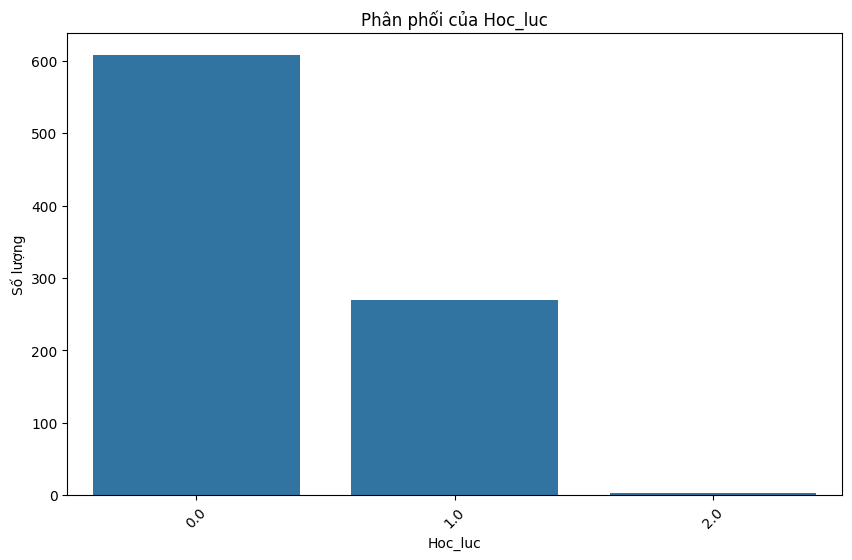

Hoc_luc
0.0    608
1.0    270
2.0      3
Name: count, dtype: int64


In [61]:
plot_bar_chart(df, 'Hoc_luc')
print(df['Hoc_luc'].value_counts(dropna=False))

In [62]:
# Xử lý các giá trị NaN và 3.0 trong cột 'Hanh_kiem'
df['Hanh_kiem'] = df['Hanh_kiem'].replace(2.0, np.nan)

# Lọc dữ liệu có giá trị 'Hanh_kiem' không phải NaN
df_known = df.dropna(subset=['Hanh_kiem'])
df_unknown = df[df['Hanh_kiem'].isna()]

# Kiểm tra nếu df_unknown không rỗng
if df_unknown.empty:
    print("Không có dòng nào có giá trị 'Hanh_kiem' là NaN.")
else:
    # Các cột đặc trưng
    features = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

    # Tạo X_known và y_known
    X_known = df_known[features].copy()
    y_known = df_known['Hanh_kiem']

    # Mã hóa các biến phân loại
    label_encoders = {}
    for feature in features:
        le = LabelEncoder()
        X_known[feature] = le.fit_transform(X_known[feature].astype(str))
        label_encoders[feature] = le

    # Tạo bộ dữ liệu không biết giá trị và mã hóa
    X_unknown = df_unknown[features].copy()
    for feature in features:
        if X_unknown[feature].dtype == 'object':
            X_unknown[feature] = label_encoders[feature].transform(X_unknown[feature].astype(str))
        else:
            X_unknown[feature] = X_unknown[feature].astype(float)  # Đảm bảo kiểu dữ liệu đúng

    # Kiểm tra nếu X_unknown không rỗng
    if X_unknown.empty:
        print("Dữ liệu không hợp lệ trong X_unknown.")
    else:
        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

        # Khởi tạo và huấn luyện mô hình hồi quy logistic
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Dự đoán các giá trị 'Hanh_kiem' trên tập kiểm tra
        y_pred = model.predict(X_test)
        print('Accuracy on test set:', accuracy_score(y_test, y_pred))

        # Dự đoán giá trị 'Hanh_kiem' cho các dòng không biết
        y_pred_unknown = model.predict(X_unknown)

        # Cập nhật DataFrame với các giá trị đã dự đoán
        df.loc[df['Hanh_kiem'].isna(), 'Hanh_kiem'] = y_pred_unknown

        # Kiểm tra kết quả
        print('Giá trị sau khi dự đoán bằng hồi quy logistic\n', df['Hanh_kiem'].value_counts(dropna=False), '\n')


Accuracy on test set: 1.0
Giá trị sau khi dự đoán bằng hồi quy logistic
 Hanh_kiem
0.0    876
1.0      5
Name: count, dtype: int64 



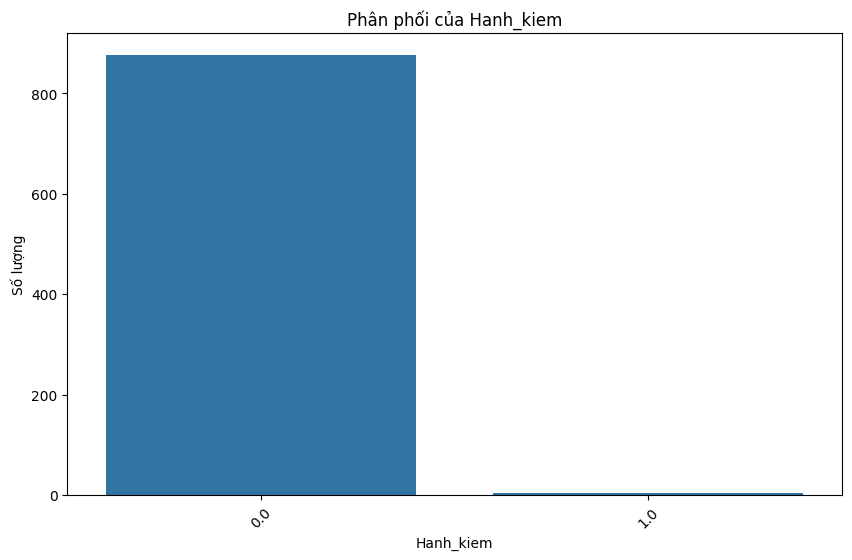

Hanh_kiem
0.0    876
1.0      5
Name: count, dtype: int64


In [63]:
plot_bar_chart(df, 'Hanh_kiem')
print(df['Hanh_kiem'].value_counts(dropna=False))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 927
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          881 non-null    int64  
 1   ETH          881 non-null    int64  
 2   GraYear      881 non-null    int32  
 3   KVUT         0 non-null      float64
 4   PTXT         881 non-null    int32  
 5   PTXTname     881 non-null    int32  
 6   Hoc_luc      881 non-null    float64
 7   Hanh_kiem    881 non-null    float64
 8   To_hop       881 non-null    int32  
 9   ScoTHPT1     881 non-null    int64  
 10  ScoTHPT2     881 non-null    int64  
 11  ScoTHPT3     881 non-null    int64  
 12  ScoTHPT      881 non-null    int64  
 13  TB_HK1       881 non-null    int64  
 14  CN1          881 non-null    int64  
 15  CN2          881 non-null    int64  
 16  K12_Math     881 non-null    int64  
 17  K12_Ling     881 non-null    int64  
 18  K12_Flang    881 non-null    int64  
 19  K12_Phys     

In [65]:
df = df.drop(columns=['KVUT'], errors='ignore')

# Làm sạch dữ liệu cột Mjob và Fjob bằng mô hình PhoBERT và tokenizer sau đó phân cụm nó

In [66]:
# Tải mô hình PhoBERT và tokenizer
phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
# Chuyển đổi các giá trị trong cột 'Fjob' thành tensor
encoded_inputs = tokenizer(df['Fjob'].tolist(), padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    features = phobert(**encoded_inputs)
    embeddings = features.last_hidden_state.mean(dim=1)  # Lấy trung bình các vector đặc trưng

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [68]:
# Áp dụng K-Means để phân cụm
kmeans = KMeans(n_clusters=5, random_state=42)
df['Fjob_Cluster'] = kmeans.fit_predict(embeddings)

In [69]:
# Giảm số chiều xuống 3 chiều để dễ dàng vẽ biểu đồ 3D
pca = PCA(n_components=3)
embedding_3d = pca.fit_transform(embeddings.numpy())
# Thêm kết quả PCA vào DataFrame
df['PCA1'] = embedding_3d[:, 0]
df['PCA2'] = embedding_3d[:, 1]
df['PCA3'] = embedding_3d[:, 2]

# Tạo biểu đồ 3D
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3', color='Fjob_Cluster', 
                    hover_data=['Fjob'],
                    title="Phân Cụm Các Nghề Nghiệp Bằng DBSCAN")

# Hiển thị biểu đồ
fig.show()

# <h1>Xuất file sau khi đã làm sạch dữ liệu v0</h1>

In [70]:
df = df.drop(columns=['PCA1', 'PCA2','PCA3','Mjob','Fjob' ], errors='ignore')
df.to_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')

In [71]:
df = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')
df = df.drop(columns=['Unnamed: 0'])

In [72]:
from collections import Counter
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['TB_HK1','CN1', 'CN2'])
y = df['TB_HK1']
print("Số lượng nhãn trước khi xử lý:", Counter(y))

Số lượng nhãn trước khi xử lý: Counter({3: 506, 2: 328, 1: 43, 0: 4})


In [73]:
# Tăng mẫu lớp ít bằng SMOTE
smote = SMOTE(sampling_strategy={0: 50, 1: 100, 2: 328, 3: 506}, random_state=42, k_neighbors=3)

# Tạo dữ liệu cân bằng sơ bộ
X_smote, y_smote = smote.fit_resample(X, y)

# Giảm mẫu lớp chiếm đa số bằng RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy={3: 400}, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_smote, y_smote)

# Chuyển đổi các cột cần về kiểu số nguyên
columns_to_convert = ['Sex', 'ETH', 'GraYear', 'PTXT', 'PTXTname', 'Hoc_luc', 'Hanh_kiem', 'To_hop', 
                      'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT', 'K12_Math', 'K12_Ling', 'K12_Flang',
                      'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'Habit', 
                      'GrMaj_Group', 'Fjob_Cluster']

X_resampled[columns_to_convert] = X_resampled[columns_to_convert].astype(int)


# Kiểm tra lại số lượng mỗi nhãn sau khi cân bằng
print("Số lượng nhãn sau khi xử lý:", Counter(y_resampled))


Số lượng nhãn sau khi xử lý: Counter({3: 400, 2: 328, 1: 100, 0: 50})


In [74]:
df = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='TB_HK1')],
    axis=1
)

df.to_csv('data/DataFinal/model/raw/SIU/data_clean_clear.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 40 to 676
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sex           878 non-null    int32
 1   ETH           878 non-null    int32
 2   GraYear       878 non-null    int32
 3   PTXT          878 non-null    int32
 4   PTXTname      878 non-null    int32
 5   Hoc_luc       878 non-null    int32
 6   Hanh_kiem     878 non-null    int32
 7   To_hop        878 non-null    int32
 8   ScoTHPT1      878 non-null    int32
 9   ScoTHPT2      878 non-null    int32
 10  ScoTHPT3      878 non-null    int32
 11  ScoTHPT       878 non-null    int32
 12  K12_Math      878 non-null    int32
 13  K12_Ling      878 non-null    int32
 14  K12_Flang     878 non-null    int32
 15  K12_Phys      878 non-null    int32
 16  K12_Chem      878 non-null    int32
 17  K12_Bio       878 non-null    int32
 18  K12_Hist      878 non-null    int32
 19  K12_Geog      878 non-null    int

# <h1>Trực quan hóa phân bố dữ liệu</h1>

In [76]:

# Tính toán số hàng và cột dựa trên số lượng cột trong df
columns_to_plot = df.columns
n_cols = 3  # Giả sử bạn muốn có 4 cột trong mỗi hàng
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Khởi tạo subplot
fig = sp.make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns_to_plot)

# Tạo một danh sách các màu sắc ngẫu nhiên cho biểu đồ
random_colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in columns_to_plot]

# Vẽ biểu đồ phân phối cho từng biến
for i, (column, color) in enumerate(zip(columns_to_plot, random_colors)):
    row = i // n_cols + 1
    col = i % n_cols + 1

    fig.add_trace(
        go.Histogram(x=df[column], marker=dict(color=color), name=column, showlegend=False),
        row=row, col=col
    )

    fig.update_xaxes(title_text=f'{column}', row=row, col=col)
    fig.update_yaxes(title_text=f'{column} Count', row=row, col=col)

# Chỉnh layout và hiển thị biểu đồ
fig.update_layout(height=500 * n_rows, width=1100, title_text="Biểu Đồ Phân Bố Dữ Liệu")
fig.show()



In [77]:
# Tính toán số hàng và cột dựa trên số lượng cột trong df
columns_to_plot = df.columns
n_cols = 3  # Giả sử bạn muốn có 4 cột trong mỗi hàng
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Khởi tạo subplot
fig = sp.make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns_to_plot)

# Tạo một danh sách các màu sắc ngẫu nhiên cho biểu đồ
random_colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in columns_to_plot]

# Vẽ box plot cho từng cột
for i, (column, color) in enumerate(zip(columns_to_plot, random_colors)):
    row = i // n_cols + 1
    col = i % n_cols + 1

    fig.add_trace(
        go.Box(y=df[column], marker=dict(color=color), name=column, showlegend=False),
        row=row, col=col
    )

    fig.update_xaxes(title_text=f'{column} Box Plot', row=row, col=col)
    fig.update_yaxes(title_text=f'{column} Value', row=row, col=col)

# Chỉnh layout và hiển thị biểu đồ
fig.update_layout(height=400 * n_rows, width=1100, title_text="Biểu Đồ Box Plot Các Cột Dữ Liệu")
fig.show()


In [78]:
from plotly.subplots import make_subplots
df_visualize = df.copy()
# Tạo biểu đồ cột phân bố số lượng sinh viên theo giới tính
sex_counts = df_visualize['Sex'].value_counts()
sex_labels = {0: 'Nam', 1: 'Nữ'}
sex_counts.index = sex_counts.index.map(sex_labels)

bar_fig = go.Figure()

bar_fig.add_trace(go.Bar(
    x=sex_counts.index,
    y=sex_counts.values,
    name='Số lượng sinh viên',
    marker_color=['blue', 'pink']
))

bar_fig.update_layout(
    title='Phân bố số lượng sinh viên theo giới tính',
    xaxis_title='Giới tính',
    yaxis_title='Số lượng sinh viên',
    xaxis=dict(tickvals=[0, 1], ticktext=['Nam', 'Nữ']),
    showlegend=False
)

# Tạo biểu đồ boxplot cho toàn bộ giá trị trong cột 'Sex'
box_fig = go.Figure()

box_fig.add_trace(go.Box(
    y=df_visualize['Sex'],
    name='Giới tính',
    boxmean='sd'
))

box_fig.update_layout(
    title='Boxplot giá trị cột Giới tính',
    yaxis_title='Giới tính',
    yaxis=dict(tickvals=[0, 1], ticktext=['Nam', 'Nữ']),
    showlegend=False
)

# Tạo layout cho hai biểu đồ nằm trong một hàng
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Biểu đồ cột', 'Boxplot'))

fig.add_trace(bar_fig.data[0], row=1, col=1)
fig.add_trace(box_fig.data[0], row=1, col=2)

fig.update_layout(
    title_text='Trực quan hóa dữ liệu giới tính',
    showlegend=False
)

fig.show()

                   Sex       ETH   GraYear      PTXT  PTXTname   Hoc_luc  \
Sex           1.000000 -0.073983 -0.014622 -0.046333  0.081367 -0.000227   
ETH          -0.073983  1.000000  0.016823  0.054155 -0.018459 -0.079267   
GraYear      -0.014622  0.016823  1.000000  0.006793  0.065446 -0.058548   
PTXT         -0.046333  0.054155  0.006793  1.000000 -0.363800 -0.032006   
PTXTname      0.081367 -0.018459  0.065446 -0.363800  1.000000 -0.054440   
Hoc_luc      -0.000227 -0.079267 -0.058548 -0.032006 -0.054440  1.000000   
Hanh_kiem    -0.030831  0.032008  0.020801 -0.005801  0.001977  0.137569   
To_hop        0.105560 -0.009176  0.005601  0.328455 -0.115503  0.054067   
ScoTHPT1     -0.023992  0.154557 -0.034346  0.455561 -0.155280  0.153699   
ScoTHPT2     -0.087854  0.215519  0.084369  0.466257 -0.158925  0.020470   
ScoTHPT3     -0.037344  0.279498  0.050454  0.384328 -0.130999  0.106876   
ScoTHPT       0.017993  0.501343  0.058452 -0.085528  0.041955  0.141384   
K12_Math    

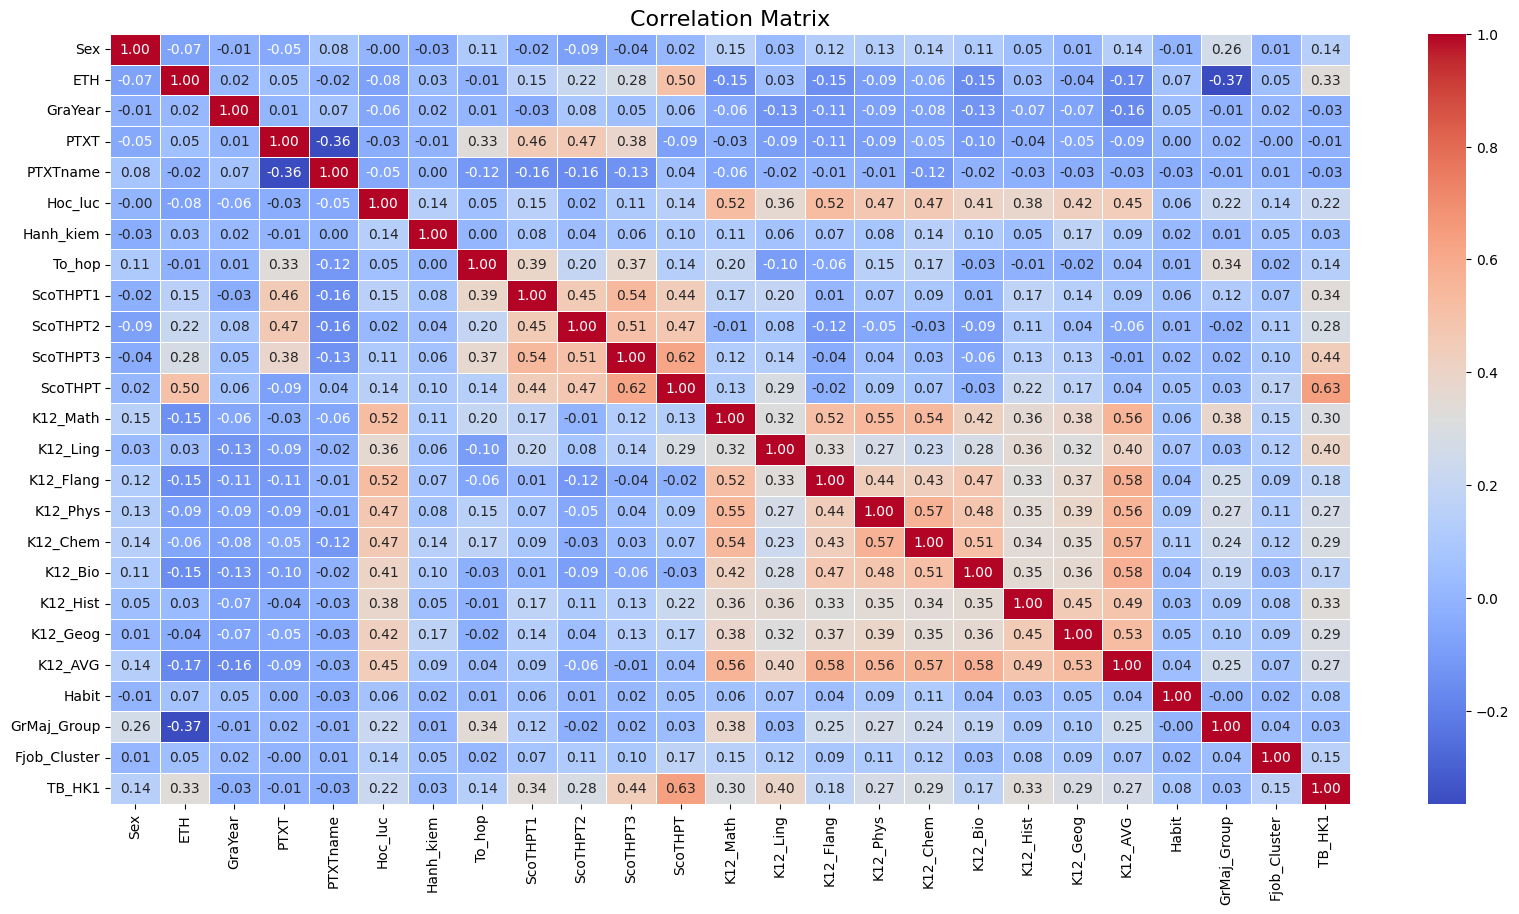

In [79]:
corr_matrix = df.corr()
print(corr_matrix)
# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [80]:
# Tính toán ma trận tương quan giữa các cột cần thiết
corr_subset = df[['GraYear', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'TB_HK1']].corr()
# In ra màn hình tỷ lệ tương quan
print(corr_subset)

           GraYear  ScoTHPT1  ScoTHPT2  ScoTHPT3    TB_HK1
GraYear   1.000000 -0.034346  0.084369  0.050454 -0.027291
ScoTHPT1 -0.034346  1.000000  0.452931  0.536609  0.337523
ScoTHPT2  0.084369  0.452931  1.000000  0.508568  0.282931
ScoTHPT3  0.050454  0.536609  0.508568  1.000000  0.436145
TB_HK1   -0.027291  0.337523  0.282931  0.436145  1.000000


Ảnh Hưởng của GraYear: Dựa trên các hệ số tương quan, GraYear không có ảnh hưởng rõ rệt đến điểm số trong các kỳ thi THPT (ScoTHPT1, ScoTHPT2, ScoTHPT3).<br> Các hệ số tương quan rất thấp cho thấy không có mối liên hệ đáng kể giữa năm tốt nghiệp và điểm số và output là TB_HK1. Nên quyết định xóa cột dữ liệu này đi.

In [81]:
# df = df.drop(columns=['GraYear' ], errors='ignore')

- Ảnh Hưởng của PTXTname: Dựa trên các hệ số tương quan, PTXTname có hệ số tương quan rất thấp cho thấy không có mối liên hệ đáng kể giữa PTXTname và <br>các cột dữ liệu, chỉ tương quan ngược chiều mạnh nhất PTXT mà bản thân PTXT cũng đã đại diện cho PTXTname. Nên quyết định xóa cột dữ liệu này đi.
- PTXT có 4 giá trị khác nhau nhưng 1 giá trị có số lượng rất lớn áp đảo các giá trị còn lại, sẽ ảnh hưởng xấu đến mô hình nên quyết định xóa nó đi
- Hanh_kiem cũng tương tự

In [82]:
df = df.drop(columns=['PTXTname','PTXT','Hanh_kiem' ], errors='ignore')

                TB_HK1
TB_HK1        1.000000
ScoTHPT       0.633813
ScoTHPT3      0.436145
K12_Ling      0.396926
ScoTHPT1      0.337523
ETH           0.332296
K12_Hist      0.331464
K12_Math      0.302923
K12_Geog      0.294849
K12_Chem      0.289890
ScoTHPT2      0.282931
K12_Phys      0.270751
K12_AVG       0.270557
Hoc_luc       0.218208
K12_Flang     0.178714
K12_Bio       0.170176
Fjob_Cluster  0.153924
Sex           0.143033
To_hop        0.137380
Habit         0.080958
GrMaj_Group   0.027641
GraYear      -0.027291


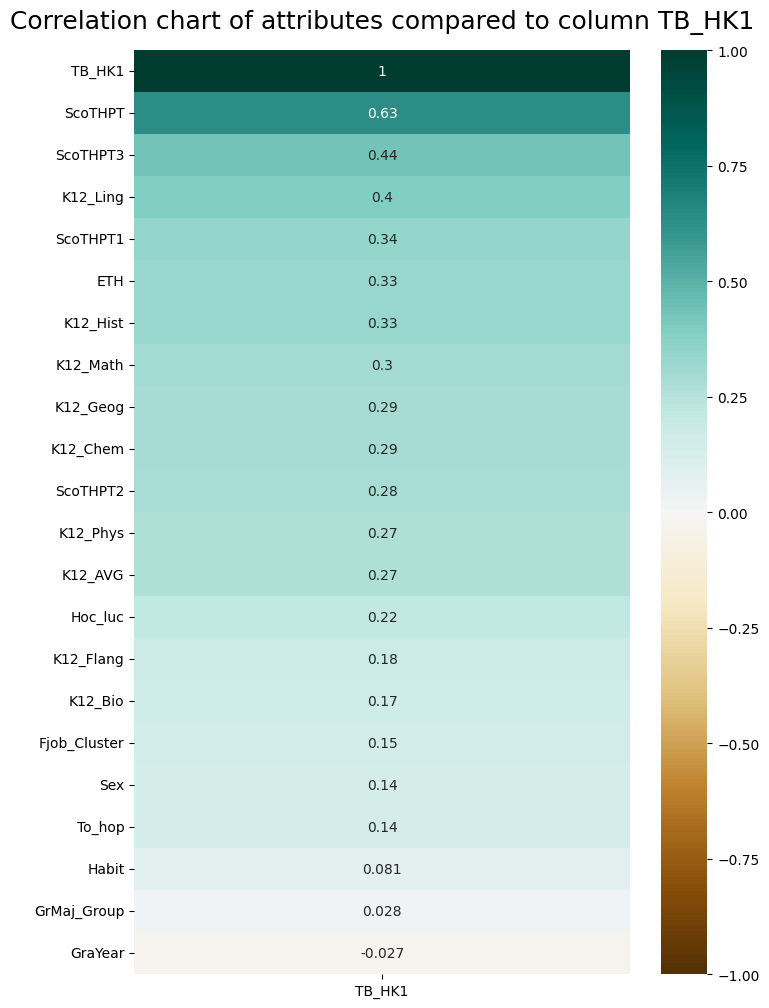

In [83]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['TB_HK1']].sort_values(by='TB_HK1', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation chart of attributes compared to column TB_HK1', fontdict={'fontsize':18}, pad=16)
plt.show()

- Tương quan mạnh với ScoTHPT: Cột ScoTHPT có tương quan cao nhất với TB_HK1 (0.582667). Điều này cho thấy điểm trung bình học kỳ 1 (TB_HK1) có mối quan hệ khá chặt chẽ với điểm tổng kết của học sinh trong kỳ thi THPT.

- Tương quan trung bình với ScoTHPT3, CN2, ScoTHPT2: Các biến này có tương quan trung bình với TB_HK1, với giá trị tương quan lần lượt là 0.381950, 0.322585, và 0.297622. Điều này chỉ ra rằng điểm tổng kết của học sinh trong các năm học khác và các môn học khác cũng có ảnh hưởng nhất định đến TB_HK1.

- Tương quan yếu với các biến khác: Một số biến như CN1, To_hop, K12_Ling, K12_Math... có độ tương quan yếu với TB_HK1, với giá trị từ khoảng 0.2 đến 0.1. Mặc dù các biến này có ảnh hưởng đến TB_HK1, nhưng không phải là yếu tố quyết định.

- Tương quan âm với PTXT, Sex, Habit: Các biến này có tương quan âm với TB_HK1, với giá trị tương quan lần lượt là -0.041580, -0.068646, và -0.083303. Điều này cho thấy rằng những biến này có xu hướng giảm khi TB_HK1 tăng, mặc dù ảnh hưởng của chúng không quá đáng kể.

# <h1>Xuất file làm sạch v1</h1>

In [84]:
df.to_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 40 to 676
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sex           878 non-null    int32
 1   ETH           878 non-null    int32
 2   GraYear       878 non-null    int32
 3   Hoc_luc       878 non-null    int32
 4   To_hop        878 non-null    int32
 5   ScoTHPT1      878 non-null    int32
 6   ScoTHPT2      878 non-null    int32
 7   ScoTHPT3      878 non-null    int32
 8   ScoTHPT       878 non-null    int32
 9   K12_Math      878 non-null    int32
 10  K12_Ling      878 non-null    int32
 11  K12_Flang     878 non-null    int32
 12  K12_Phys      878 non-null    int32
 13  K12_Chem      878 non-null    int32
 14  K12_Bio       878 non-null    int32
 15  K12_Hist      878 non-null    int32
 16  K12_Geog      878 non-null    int32
 17  K12_AVG       878 non-null    int32
 18  Habit         878 non-null    int32
 19  GrMaj_Group   878 non-null    int

In [451]:
df_visualize = df.copy()

              ScoTHPT3
ScoTHPT3      1.000000
ScoTHPT       0.616447
ScoTHPT1      0.536609
ScoTHPT2      0.508568
TB_HK1        0.436145
To_hop        0.370009
ETH           0.279498
K12_Ling      0.139697
K12_Hist      0.130926
K12_Geog      0.130883
K12_Math      0.120361
Hoc_luc       0.106876
Fjob_Cluster  0.097039
GraYear       0.050454
K12_Phys      0.043108
K12_Chem      0.025690
GrMaj_Group   0.017687
Habit         0.016211
K12_AVG      -0.011092
K12_Flang    -0.036185
Sex          -0.037344
K12_Bio      -0.058251


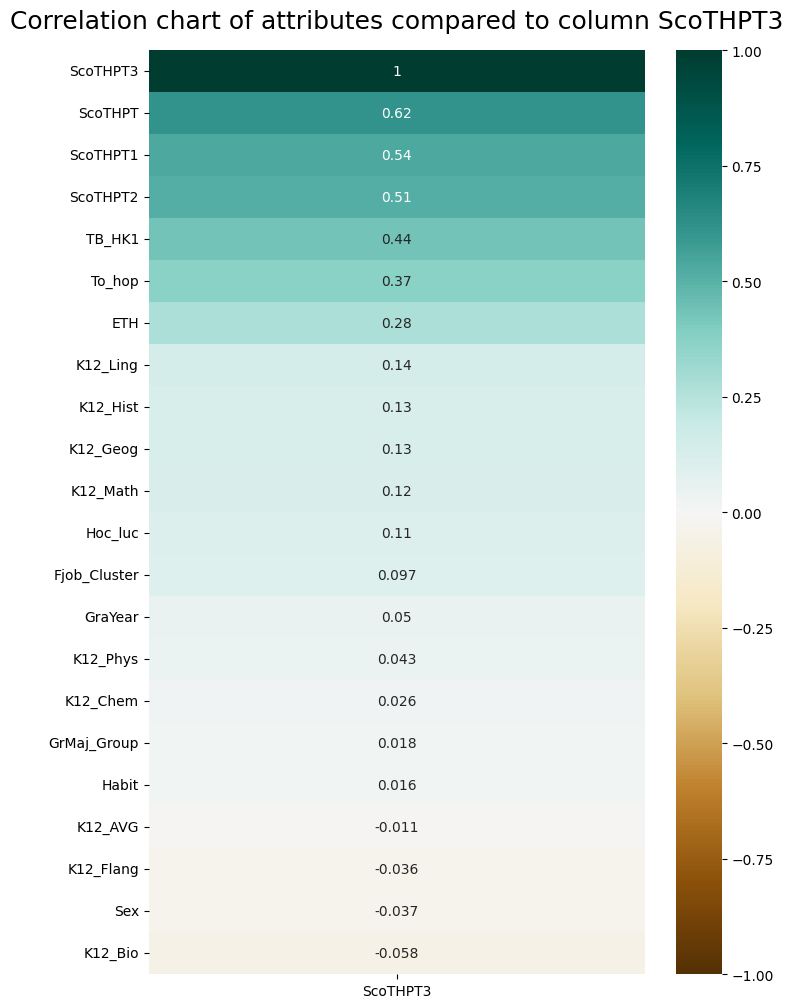

In [452]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['ScoTHPT3']].sort_values(by='ScoTHPT3', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation chart of attributes compared to column ScoTHPT3', fontdict={'fontsize':18}, pad=16)
plt.show()

In [453]:
df_visualize = pd.DataFrame()

In [454]:
def reverse_TBHK1(diem):
    if diem == 0:
        return "Excellent"
    elif diem == 1:
        return "Good"
    elif diem == 2:
        return "Fair"
    elif diem == 3:
        return "Weak"
    

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Weak')])

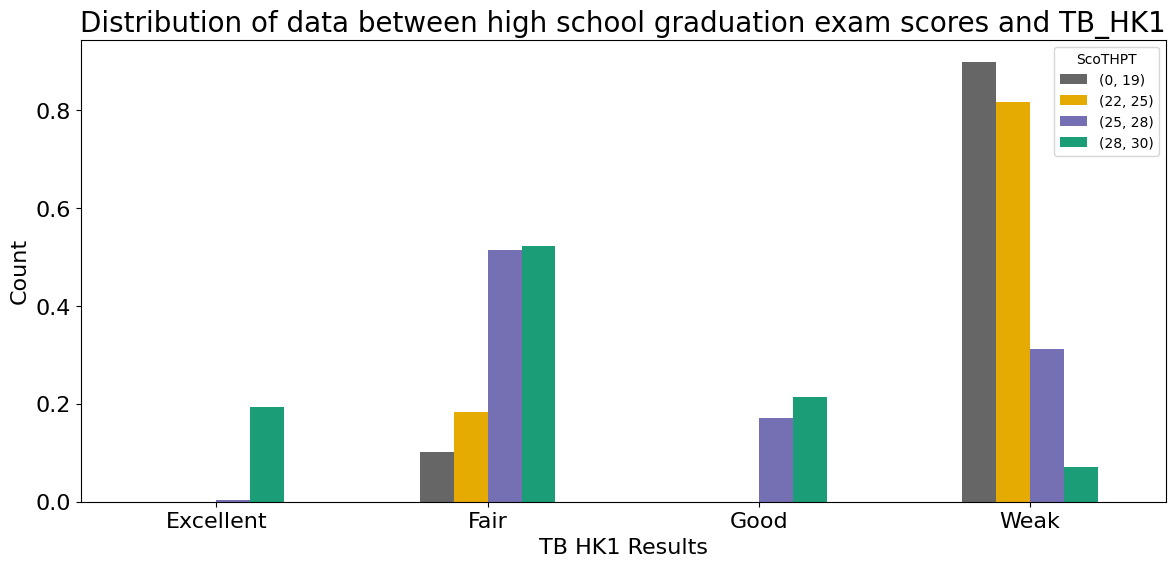

In [455]:
def reverse_function_ScoTHPT(score):
    if score == 0:
        return "(28, 30)"
    elif score == 1:
        return "(25, 28)"
    elif score == 2:
        return "(22, 25)"
    elif score == 3:
        return "(0, 19)"

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)
df_visualize['ScoTHPT'] = df['ScoTHPT'].apply(reverse_function_ScoTHPT)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['ScoTHPT'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between high school graduation exam scores and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


Nhận xét: 
- Những sinh viên có kết quả xuất sắc và giỏi thường có điểm tốt nghiệp thpt từ 25 trở lên
- Những sinh viên có kết quả khá ,trung bình và kém thường có điểm tốt nghiệp thpt từ 19 điểm đến 22

In [ ]:
df = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Weak')])

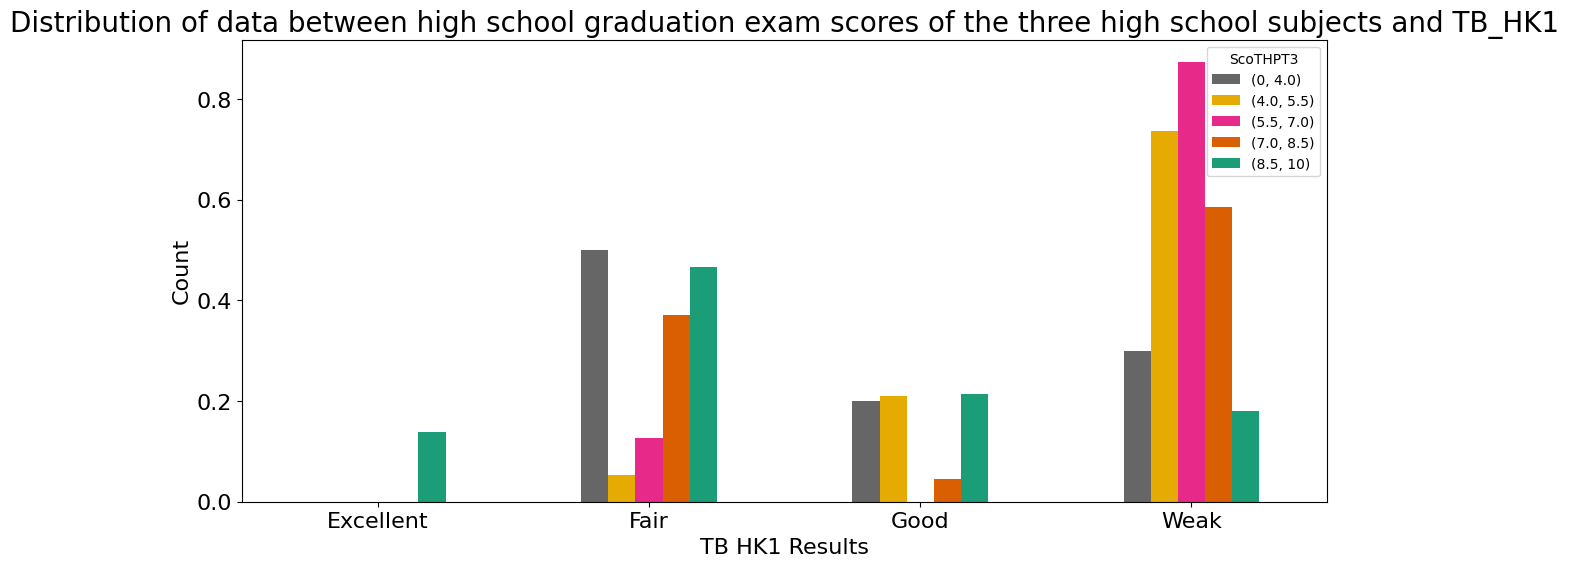

In [457]:
df = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_clear.csv')
df = df.drop(columns=['Unnamed: 0'])
df_visualize = df.copy()

def reverse_function_ScoTHPT2(numeric_score):
    if numeric_score == 0:
        return "(8.5, 10)"
    elif numeric_score == 1:
        return "(7.0, 8.5)"
    elif numeric_score == 2:
        return "(5.5, 7.0)"
    elif numeric_score == 3:
        return "(4.0, 5.5)"
    elif numeric_score == 4:
        return "(0, 4.0)"
    else:
        return None  # for invalid numeric scores



df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)
df_visualize['ScoTHPT3'] = df['ScoTHPT3'].apply(reverse_function_ScoTHPT2)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['ScoTHPT3'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between high school graduation exam scores of the three high school subjects and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


Nhận xét: 
- Những sinh viên có kết quả xuất sắc thường là những sinh viên có điểm thi thpt môn thứ 3 trên 8.5
- Những sinh viên có kết quả giỏi và khá thường là những sinh viên có điểm thi thpt môn thứ 3 trên 8.5 hoặc dưới 4 điểm 
- Những sinh viên có kết quả trung bình thường là những sinh viên có điểm thi thpt môn thứ 3 từ 5.5 đến 7
- Những sinh viên có kết quả yếu thường là những sinh viên có điểm thi thpt môn thứ 3 dưới từ 4 đến 5.5

Text(0, 0.5, 'Count')

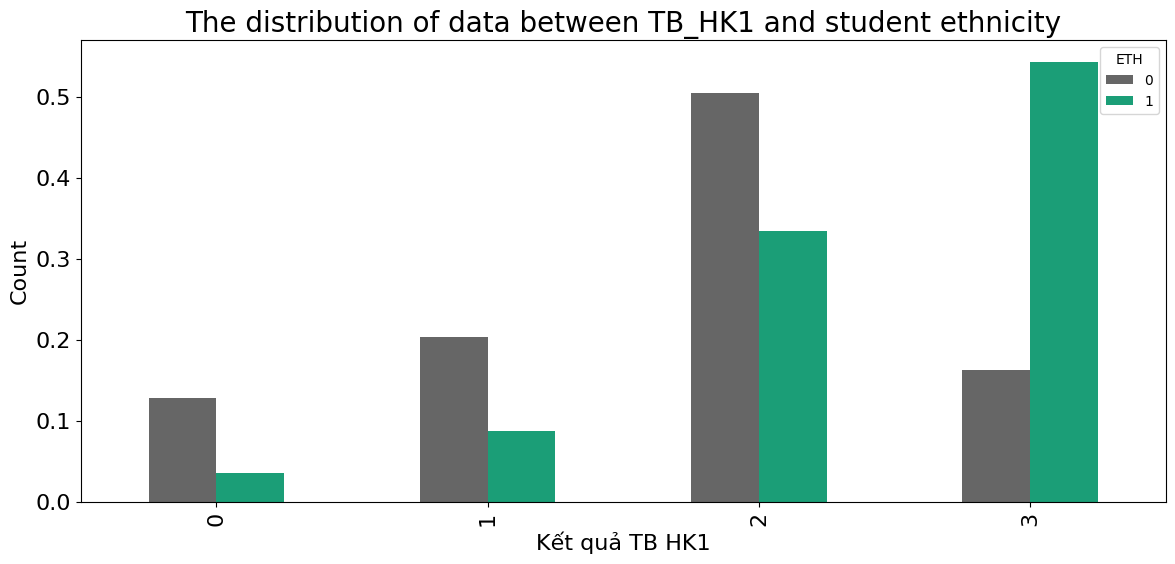

In [458]:
perc = (lambda col: col/col.sum())
index = [0,1,2,3]
higher_tab = pd.crosstab(index=df['TB_HK1'], columns=df['ETH'])
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('The distribution of data between TB_HK1 and student ethnicity', fontsize=20)
plt.xlabel('Kết quả TB HK1', fontsize=16)
plt.ylabel('Count', fontsize=16)

Nhận xét: 
- Những sinh viên có kết quả xuất sắc, giỏi và khá thường là những sinh viên dân tộc thiểu số

Text(0, 0.5, 'Count')

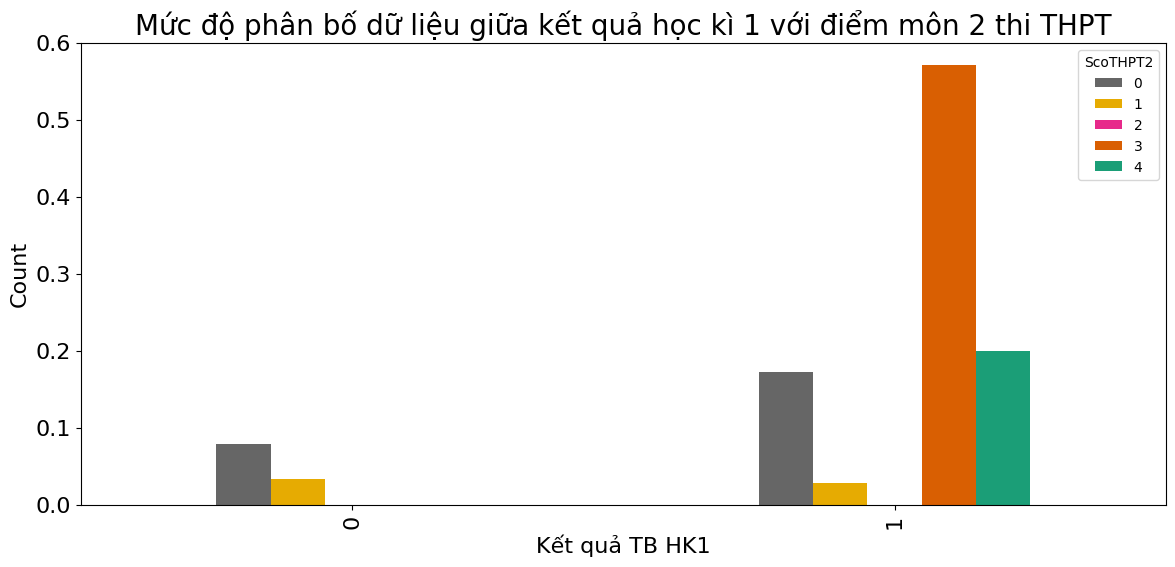

In [459]:
perc = (lambda col: col/col.sum())
index = [0,1]
higher_tab = pd.crosstab(index=df['TB_HK1'], columns=df['ScoTHPT2'])
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Mức độ phân bố dữ liệu giữa kết quả học kì 1 với điểm môn 2 thi THPT', fontsize=20)
plt.xlabel('Kết quả TB HK1', fontsize=16)
plt.ylabel('Count', fontsize=16)

Nhận xét: 
- Những sinh viên có kết quả xuất sắc thường là những sinh viên có điểm thi thpt môn thứ 2 trên 7
- Những sinh viên có kết quả giỏi và khá thường là những sinh viên có điểm thi thpt môn thứ 2 trên 8.5 hoặc dưới 4 điểm 
- Những sinh viên có kết quả trung bình thường là những sinh viên có điểm thi thpt môn thứ 2 từ 5.5 đến 7
- Những sinh viên có kết quả yếu thường là những sinh viên có điểm thi thpt môn thứ 2 dưới từ 4 đến 5.5

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Weak')])

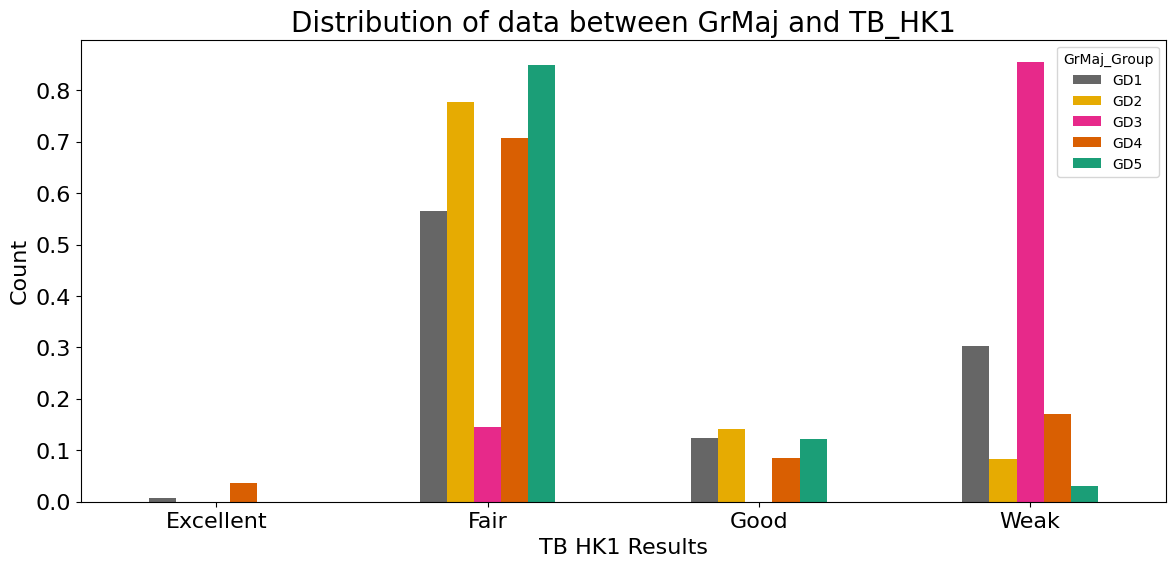

In [460]:
df_visualize = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df_visualize['TB_HK1'].apply(reverse_TBHK1)

# Load mô hình LabelEncoder
label_encoder = joblib.load('B:/DoAnTotNghiep/DATA_Giaoduc/label_encoder/SIU/GrMaj_Group_labelencoder.pkl')  # Thay đổi đường dẫn nếu cần

# Giả sử df_visualize là DataFrame đã được tạo trước đó
df_visualize['GrMaj_Group'] = label_encoder.inverse_transform(df_visualize['GrMaj_Group'])

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['GrMaj_Group'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between GrMaj and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Weak')])

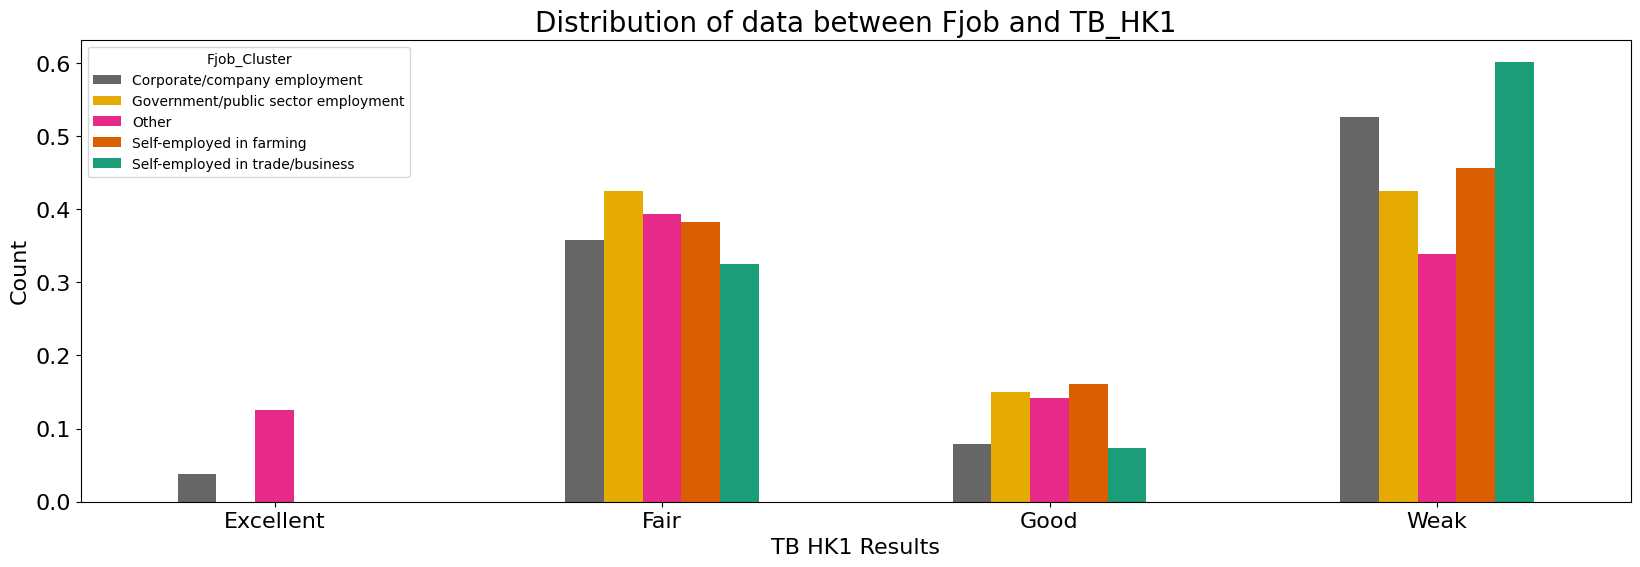

In [461]:
df_visualize = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_clear.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)

def reverse_function_Fjob(value):
    if value == 0:
        return "Other"
    elif value == 1:
        return "Corporate/company employment"
    elif value == 2:
        return "Self-employed in trade/business"
    elif value == 3:
        return "Self-employed in farming"
    elif value == 4:
        return "Government/public sector employment"
    else:
        return None  # for invalid numeric scores

df_visualize['Fjob_Cluster'] = df['Fjob_Cluster'].apply(reverse_function_Fjob)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['Fjob_Cluster'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(20, 6), fontsize=16)
plt.title('Distribution of data between Fjob and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Weak')])

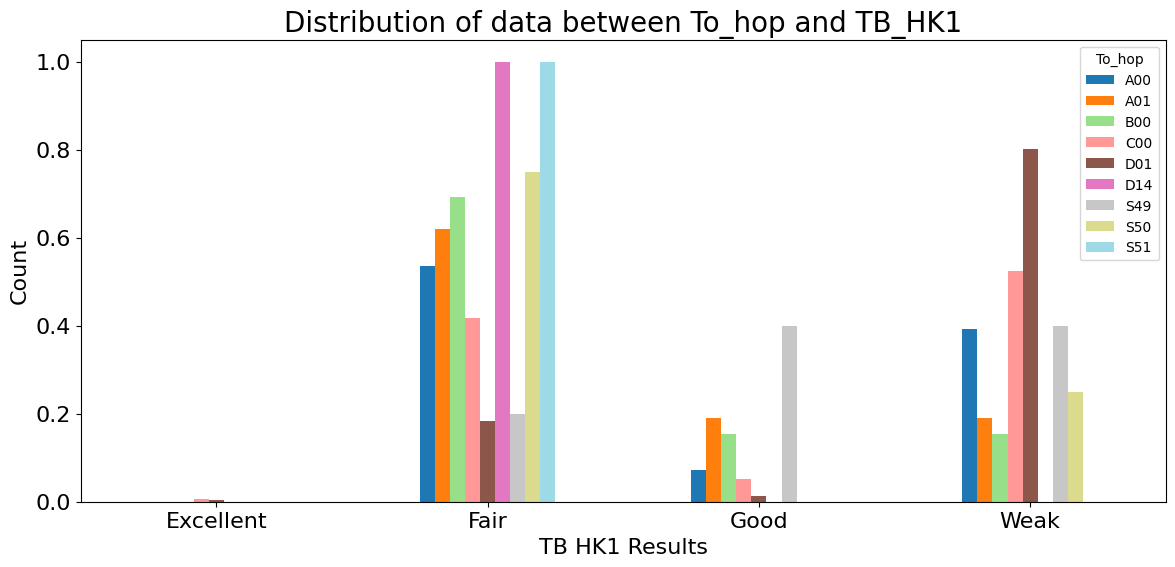

In [463]:

df_visualize = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df_visualize['TB_HK1'].apply(reverse_TBHK1)

# Load mô hình LabelEncoder
label_encoder = joblib.load('B:/DoAnTotNghiep/DATA_Giaoduc/label_encoder/SIU/To_hop_labelencoder.pkl')  # Thay đổi đường dẫn nếu cần

# Giả sử df_visualize là DataFrame đã được tạo trước đó
df_visualize['To_hop'] = label_encoder.inverse_transform(df_visualize['To_hop'])

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['To_hop'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="tab20", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between To_hop and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


In [465]:
df_visualize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           881 non-null    int64  
 1   ETH           881 non-null    int64  
 2   GraYear       881 non-null    int64  
 3   PTXT          881 non-null    int64  
 4   PTXTname      881 non-null    int64  
 5   Hoc_luc       881 non-null    float64
 6   Hanh_kiem     881 non-null    float64
 7   To_hop        881 non-null    object 
 8   ScoTHPT1      881 non-null    int64  
 9   ScoTHPT2      881 non-null    int64  
 10  ScoTHPT3      881 non-null    int64  
 11  ScoTHPT       881 non-null    int64  
 12  TB_HK1        881 non-null    object 
 13  CN1           881 non-null    int64  
 14  CN2           881 non-null    int64  
 15  K12_Math      881 non-null    int64  
 16  K12_Ling      881 non-null    int64  
 17  K12_Flang     881 non-null    int64  
 18  K12_Phys      881 non-null    

In [466]:
df_visualize = pd.DataFrame()
df_visualize = df

# <h1>Huấn luyện mô hình</h1>

In [467]:
import pandas as pd
import numpy as np
import warnings
import joblib
import plotly.figure_factory as ff

from xgboost import XGBRegressor, XGBClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.metrics import make_scorer,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import classification_report ,roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning


In [468]:
df_clean = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])

In [469]:
show_infor_dataframe(df_clean)

Column 'Sex' has 2 unique values:
[0 1]


Column 'ETH' has 2 unique values:
[1 0]


Column 'GraYear' has 5 unique values:
[4 3 0 2 1]


Column 'PTXT' has 4 unique values:
[0 1 3 2]


Column 'PTXTname' has 2 unique values:
[1 0]


Column 'Hoc_luc' has 3 unique values:
[0 1 2]


Column 'Hanh_kiem' has 2 unique values:
[0 1]


Column 'To_hop' has 9 unique values:
[4 3 0 1 2 6 5 8 7]


Column 'ScoTHPT1' has 5 unique values:
[0 1 4 2 3]


Column 'ScoTHPT2' has 5 unique values:
[1 0 4 3 2]


Column 'ScoTHPT3' has 5 unique values:
[0 1 4 3 2]


Column 'ScoTHPT' has 4 unique values:
[1 0 2 3]


Column 'K12_Math' has 4 unique values:
[0 1 2 3]


Column 'K12_Ling' has 4 unique values:
[0 1 2 4]


Column 'K12_Flang' has 4 unique values:
[0 1 2 3]


Column 'K12_Phys' has 5 unique values:
[0 1 2 3 4]


Column 'K12_Chem' has 4 unique values:
[0 1 2 3]


Column 'K12_Bio' has 4 unique values:
[0 1 2 3]


Column 'K12_Hist' has 5 unique values:
[0 1 4 2 3]


Column 'K12_Geog' has 3 unique values:
[0 1 2

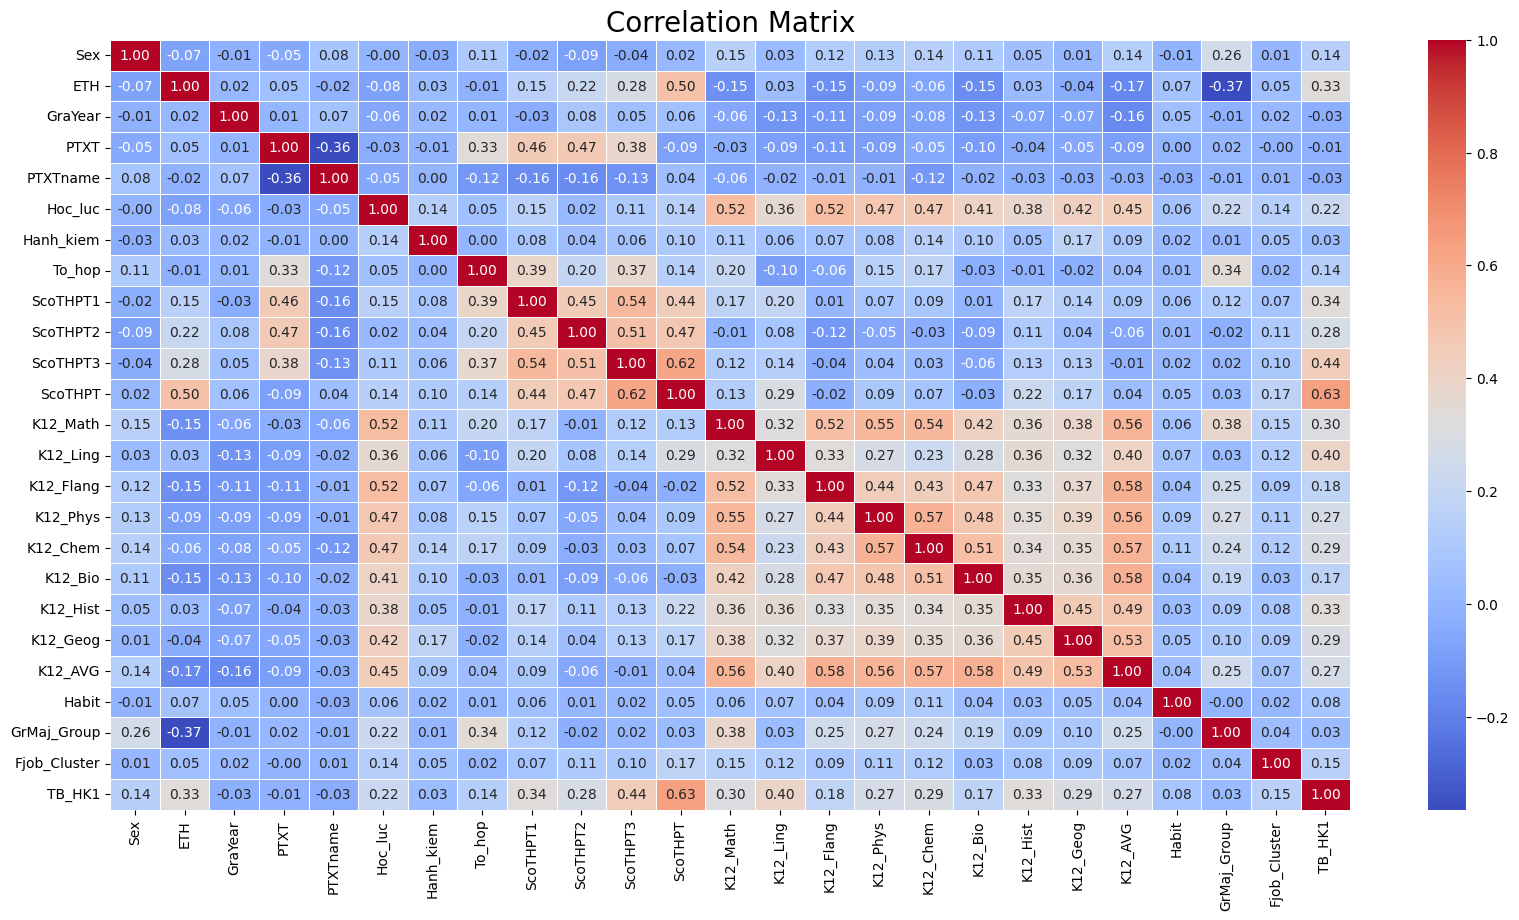

In [470]:
corr_matrix = df_clean.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

                TB_HK1
TB_HK1        1.000000
ScoTHPT       0.633813
ScoTHPT3      0.436145
K12_Ling      0.396926
ScoTHPT1      0.337523
ETH           0.332296
K12_Hist      0.331464
K12_Math      0.302923
K12_Geog      0.294849
K12_Chem      0.289890
ScoTHPT2      0.282931
K12_Phys      0.270751
K12_AVG       0.270557
Hoc_luc       0.218208
K12_Flang     0.178714
K12_Bio       0.170176
Fjob_Cluster  0.153924
Sex           0.143033
To_hop        0.137380
Habit         0.080958
Hanh_kiem     0.029765
GrMaj_Group   0.027641
PTXT         -0.011795
GraYear      -0.027291
PTXTname     -0.030203


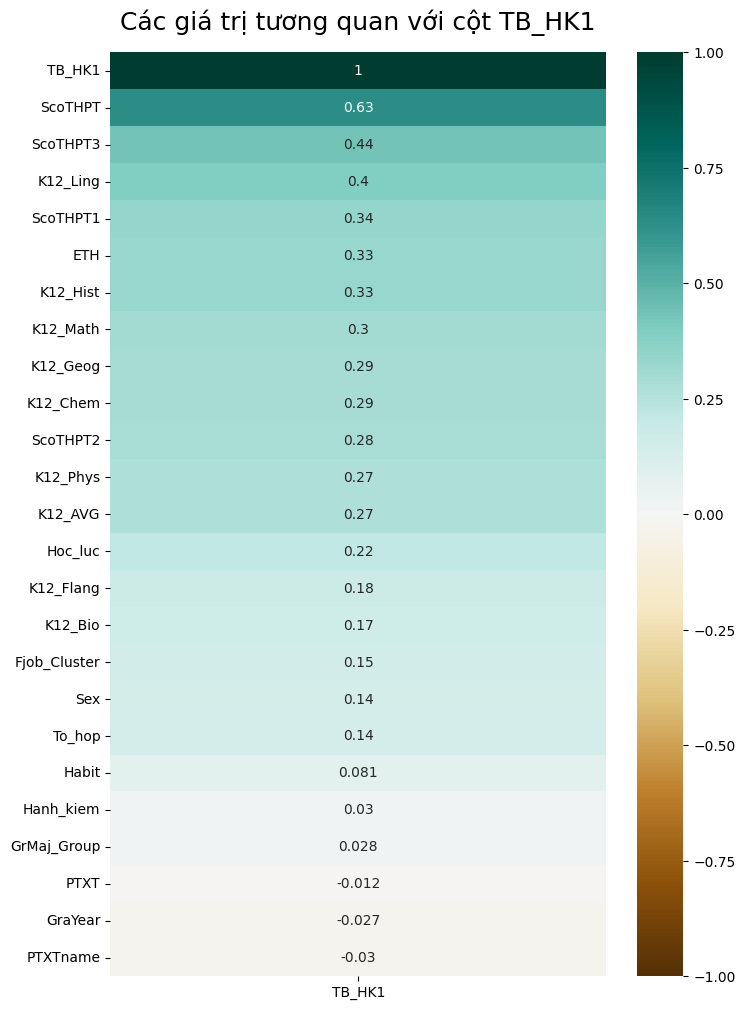

In [471]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['TB_HK1']].sort_values(by='TB_HK1', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Các giá trị tương quan với cột TB_HK1', fontdict={'fontsize':18}, pad=16)
plt.show()

In [472]:
df_trainmodel = pd.DataFrame()
df_trainmodel = df_clean

In [473]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel.columns
# Thực hiện Label Encoding
df_trainmodel, label_encoders = label_encode_columns(df_trainmodel, columns_to_encode)

In [475]:
# Tách đầu vào và đầu ra
# X = df_trainmodel.drop(columns=['GrMaj','TB_HK1','CN1', 'CN2'])
# y = df_trainmodel['GrMaj']

X = df_trainmodel.drop(columns=['TB_HK1'])
y = df_trainmodel['TB_HK1']

# XGBClassifier

In [476]:
df_clean = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])
# Đọc dữ liệu
df_trainmodel_XGBC = df_clean


In [477]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel_XGBC.columns
# Thực hiện Label Encoding
df_trainmodel_XGBC, label_encoders = label_encode_columns(df_trainmodel_XGBC, columns_to_encode)

In [478]:
show_infor_dataframe(df_trainmodel_XGBC)

Column 'Sex' has 2 unique values:
[0 1]


Column 'ETH' has 2 unique values:
[1 0]


Column 'GraYear' has 5 unique values:
[4 3 0 2 1]


Column 'PTXT' has 4 unique values:
[0 1 3 2]


Column 'PTXTname' has 2 unique values:
[1 0]


Column 'Hoc_luc' has 3 unique values:
[0 1 2]


Column 'Hanh_kiem' has 2 unique values:
[0 1]


Column 'To_hop' has 9 unique values:
[4 3 0 1 2 6 5 8 7]


Column 'ScoTHPT1' has 5 unique values:
[0 1 4 2 3]


Column 'ScoTHPT2' has 5 unique values:
[1 0 4 3 2]


Column 'ScoTHPT3' has 5 unique values:
[0 1 4 3 2]


Column 'ScoTHPT' has 4 unique values:
[1 0 2 3]


Column 'K12_Math' has 4 unique values:
[0 1 2 3]


Column 'K12_Ling' has 4 unique values:
[0 1 2 3]


Column 'K12_Flang' has 4 unique values:
[0 1 2 3]


Column 'K12_Phys' has 5 unique values:
[0 1 2 3 4]


Column 'K12_Chem' has 4 unique values:
[0 1 2 3]


Column 'K12_Bio' has 4 unique values:
[0 1 2 3]


Column 'K12_Hist' has 5 unique values:
[0 1 4 2 3]


Column 'K12_Geog' has 3 unique values:
[0 1 2

In [479]:
# Tách biến đầu vào và đầu ra
# X = df_trainmodel_XGBC.drop(['TB_HK1','CN1','CN2'], axis=1)
X = df_trainmodel_XGBC.drop(['TB_HK1'], axis=1)
y = df_trainmodel_XGBC['TB_HK1']

In [ ]:

optimal_state = None
best_accuracy = float('-inf')
best_f1_score = float('-inf')

for _ in range(100):
    state = np.random.randint(1, 100000000) - 1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state, stratify=y)
    
    model = XGBClassifier(objective='binary:logistic') 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  

    if accuracy > best_accuracy or f1 > best_f1_score:
        best_accuracy = accuracy
        best_f1_score = f1
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best F1 Score: {best_f1_score}')


Optimal random_state: 42970142
Best Accuracy: 0.8125
Best F1 Score: 0.8133015788951908


In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42970142, stratify=y)

In [481]:
from sklearn.metrics import f1_score

In [482]:

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Khởi tạo danh sách để lưu các giá trị chỉ số đánh giá
n_estimators_values = range(1, 80, 2)
train_accuracy_values = []
test_accuracy_values = []
train_precision_values = []
test_precision_values = []
train_recall_values = []
test_recall_values = []
train_f1_values = []
test_f1_values = []
best_n_estimators = None
best_f1 = 0

for n_estimators in n_estimators_values:
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)
    train_precision_values.append(train_precision)
    test_precision_values.append(test_precision)
    train_recall_values.append(train_recall)
    test_recall_values.append(test_recall)
    train_f1_values.append(train_f1)
    test_f1_values.append(test_f1)
    
    print(f'train_accuracy_values: {train_accuracy}')
    print(f'test_accuracy_values: {test_accuracy}')
    print(f'train_precision_values: {train_precision}')
    print(f'test_precision_values: {test_precision}')
    print(f'train_recall_values: {train_precision}')
    print(f'test_recall_values: {test_precision}')
    print(f'train_f1_values: {train_precision}')
    print(f'test_f1_values: {test_precision}')
    print('--------------------------')
    
    if test_f1 > best_f1:
        best_f1 = test_f1
        best_n_estimators = n_estimators

XGBC_Model = XGBClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=5)
XGBC_Model.fit(X_train, y_train)

print(f'Best n_estimators: {best_n_estimators}')
print(f'Best F1 Score: {best_f1}')

# Vẽ biểu đồ bằng Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_accuracy_values, mode='lines+markers', name='Train Accuracy'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_accuracy_values, mode='lines+markers', name='Test Accuracy'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_f1_values, mode='lines+markers', name='Train F1 Score'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_f1_values, mode='lines+markers', name='Test F1 Score'))

# Đánh dấu vị trí best_n_estimators bằng một đường thẳng màu đỏ
fig.add_vline(x=best_n_estimators, line=dict(color='red', dash='dash'), name=f'Best n_estimators ({best_n_estimators})')


fig.update_layout(
    title='Performance Metrics vs n_estimators for XGBoost Classifier',
    xaxis_title='n_estimators',
    yaxis_title='Value',
    legend_title='Metrics'
)

fig.show()

train_accuracy_values: 0.7785016286644951
test_accuracy_values: 0.7537878787878788
train_precision_values: 0.8010370851232849
test_precision_values: 0.7218104347533482
train_recall_values: 0.8010370851232849
test_recall_values: 0.7218104347533482
train_f1_values: 0.8010370851232849
test_f1_values: 0.7218104347533482
--------------------------
train_accuracy_values: 0.7931596091205212
test_accuracy_values: 0.7537878787878788
train_precision_values: 0.8155586082426379
test_precision_values: 0.7305735114558645
train_recall_values: 0.8155586082426379
test_recall_values: 0.7305735114558645
train_f1_values: 0.8155586082426379
test_f1_values: 0.7305735114558645
--------------------------
train_accuracy_values: 0.7964169381107492
test_accuracy_values: 0.7575757575757576
train_precision_values: 0.8177134438412634
test_precision_values: 0.7324965883789414
train_recall_values: 0.8177134438412634
test_recall_values: 0.7324965883789414
train_f1_values: 0.8177134438412634
test_f1_values: 0.732496588

In [483]:

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
param_grid = {
    'learning_rate': [0.01,0.02, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.4,0.5,0.6,0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9, 1]
}

model = XGBClassifier(n_estimators=best_n_estimators, objective='binary:logistic') 


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=8,
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_}')

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test F1 Score: {test_f1}')

Fitting 8 folds for each of 384 candidates, totalling 3072 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.7}
Best F1 Score: 0.7672581571744086
Test Accuracy: 0.7840909090909091
Test F1 Score: 0.7810143698714341


In [484]:

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

Accuracy: 0.7840909090909091
f1_score: 0.7991481156934398
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.83      0.63      0.72        30
           2       0.73      0.69      0.71        99
           3       0.80      0.88      0.84       120

    accuracy                           0.78       264
   macro avg       0.82      0.78      0.80       264
weighted avg       0.78      0.78      0.78       264



In [485]:
# Lưu mô hình thành file
model_filename = 'model/SIU/XGBC_model.pkl'
joblib.dump(best_model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

Mô hình đã được lưu vào file model/SIU/XGBC_model.pkl


- Accuracy: 0.69 cho thấy mô hình có khả năng phân loại đúng khoảng 69% các mẫu trong tập dữ liệu kiểm tra. Đây là mức độ chính xác khá tốt nhưng có thể cải thiện hơn, đặc biệt là trong các lớp không được phân loại tốt.
- F1-Score: 0.34 là khá thấp, cho thấy mô hình gặp khó khăn trong việc cân bằng giữa precision (độ chính xác) và recall (khả năng phát hiện). Mức điểm F1 thấp có thể chỉ ra rằng mô hình không hiệu quả trong việc phân loại các lớp cụ thể, dẫn đến kết quả không đáng tin cậy.


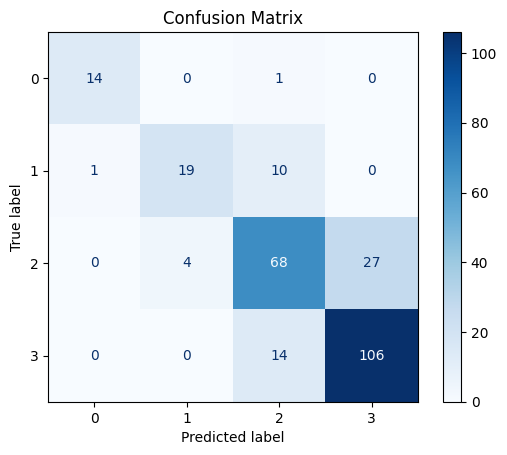

In [486]:
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [487]:
# Extract feature importances
feature_importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Độ quan trọng của các đặc trưng từ mô hình XGBClassifier Classifier',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

Đặc Trưng Quan Trọng Nhất:

- ScoTHPT (0.145515): Đây là đặc trưng có độ quan trọng cao nhất. Điều này cho thấy rằng điểm số trong kỳ thi THPT là yếu tố chính ảnh hưởng đến kết quả dự đoán của mô hình.

Đặc Trưng Quan Trọng Thứ Hai:

- GrMaj (0.072038): Đây là đặc trưng quan trọng thứ hai. Nó đại diện cho chuyên ngành cho thấy rằng các yếu tố học thuật có ảnh hưởng đáng kể đến kết quả mục tiêu.

Các Đặc Trưng Quan Trọng Khác:

Các đặc trưng như ScoTHPT3 (0.068518), ScoTHPT2 (0.049571), và To_hop (0.048195) cũng có độ quan trọng đáng kể. Điều này chỉ ra rằng điểm số trong các môn thi là những yếu tố quan trọng.

- Đặc Trưng Ít Quan Trọng Hơn:

Các đặc trưng như K12_Chem (0.029493) và K12_Ling (0.030427) có độ quan trọng thấp hơn. Tuy nhiên, chúng vẫn có một độ quan trọng nhất định, cho thấy rằng chúng vẫn góp phần vào việc dự đoán kết quả.

In [488]:
print("Độ quan trọng của các đặc trưng:")
print(importance_df.to_string(index=False))

Độ quan trọng của các đặc trưng:
     Feature  Importance
     ScoTHPT    0.159912
 GrMaj_Group    0.071567
    ScoTHPT3    0.067146
    K12_Ling    0.058577
    K12_Phys    0.051807
    K12_Chem    0.043232
      To_hop    0.042736
     K12_AVG    0.041116
     Hoc_luc    0.038313
Fjob_Cluster    0.037513
         ETH    0.036954
   K12_Flang    0.035460
    K12_Math    0.033449
    K12_Hist    0.033260
    K12_Geog    0.033156
    ScoTHPT2    0.033003
     K12_Bio    0.032791
    ScoTHPT1    0.032770
         Sex    0.032276
     GraYear    0.030477
       Habit    0.028167
        PTXT    0.026319
   Hanh_kiem    0.000000
    PTXTname    0.000000


# Mô hình Multilayer Perceptron 

In [489]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.inspection import permutation_importance
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="keras")


In [491]:
df_clean = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])

X = df_clean.drop(['TB_HK1'], axis=1)
y = df_clean['TB_HK1']


In [492]:
class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.metrics_history = []

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y = self.validation_data
        y_pred = np.argmax(self.model.predict(val_x), axis=1)
        
        f1 = f1_score(val_y, y_pred, average='weighted')
        accuracy = accuracy_score(val_y, y_pred)
        recall = recall_score(val_y, y_pred, average='weighted')
        
        self.metrics_history.append((f1, accuracy, recall))
        
        print(f'Epoch {epoch + 1} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}, Recall: {recall:.4f}')


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import f1_score, accuracy_score, recall_score
import tensorflow as tf


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42970142, stratify=y)

# Thiết lập phạm vi các giá trị cần thử nghiệm
dropout_rates = [0.2, 0.3, 0.4]
l2_rates = [0.0001, 0.001, 0.005]
learning_rates = [0.0001, 0.0005, 0.001]
batch_sizes = [32, 64, 128]

# Để lưu trữ mô hình tốt nhất
best_f1 = 0
best_model = None
best_params = {}

# Hàm tạo mô hình
def create_model(dropout_rate, l2_rate, learning_rate):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Lặp qua các giá trị của các tham số
for dropout_rate in dropout_rates:
    for l2_rate in l2_rates:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                print(f"Training with dropout={dropout_rate}, l2={l2_rate}, learning_rate={learning_rate}, batch_size={batch_size}")
                
                metrics_callback = MetricsCallback(validation_data=(X_test, y_test))
                # Tạo mô hình
                model = create_model(dropout_rate, l2_rate, learning_rate)

                # Callbacks
                early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
                # Huấn luyện mô hình
                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=300,
                    batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr, metrics_callback],
                    verbose=0
                )

                # Đánh giá mô hình
                y_pred = np.argmax(model.predict(X_test), axis=1)
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                # Lưu lại mô hình tốt nhất
                if f1 > best_f1:
                    best_f1 = f1
                    best_model = model
                    best_params = {
                        "dropout_rate": dropout_rate,
                        "l2_rate": l2_rate,
                        "learning_rate": learning_rate,
                        "batch_size": batch_size
                    }
                    model.save("model/SIU/MLP_Model1.h5")  # Lưu lại mô hình tốt nhất
                    model_filename = 'model/SIU/MLP_Model0.pkl'
                    joblib.dump(model, model_filename)

                print(f"F1 Score: {f1:.4f} with params: dropout={dropout_rate}, l2={l2_rate}, learning_rate={learning_rate}, batch_size={batch_size}")

# Hiển thị các tham số tốt nhất
print("Best F1 Score:", best_f1)
print("Best Parameters:", best_params)


Training with dropout=0.2, l2=0.0001, learning_rate=0.0001, batch_size=32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1 - F1 Score: 0.2353, Accuracy: 0.3788, Recall: 0.3788
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 2 - F1 Score: 0.3074, Accuracy: 0.3068, Recall: 0.3068
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 3 - F1 Score: 0.3301, Accuracy: 0.3030, Recall: 0.3030
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 4 - F1 Score: 0.2693, Accuracy: 0.2689, Recall: 0.2689
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5 - F1 Score: 0.2893, Accuracy: 0.2917, Recall: 0.2917
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 6 - F1 Score: 0.3374, Accuracy: 0.3333, Recall: 0.3333
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 7 - F1 Score: 0.3631, Accuracy: 0.3523, Recall: 0.3523
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 8 - F1 Score: 0.3894, Accuracy: 0.3826, Recall: 0.3826
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 9 - F1 Score: 0.4258, Accuracy: 0.4205, Recall: 0.4205
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

F1 Score: 0.7887 with params: dropout=0.2, l2=0.0001, learning_rate=0.0001, batch_size=32
Training with dropout=0.2, l2=0.0001, learning_rate=0.0001, batch_size=64
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1 - F1 Score: 0.0797, Accuracy: 0.0871, Recall: 0.0871
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 2 - F1 Score: 0.0817, Accuracy: 0.0871, Recall: 0.0871
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 3 - F1 Score: 0.1150, Accuracy: 0.1174, Recall: 0.1174
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 4 - F1 Score: 0.2269, Accuracy: 0.2083, Recall: 0.2083
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5 - F1 Score: 0.3357, Accuracy: 0.2955, Recall: 0.2955
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 6 - F1 Score: 0.4170, Accuracy: 0.3712, Recall: 0.3712
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 7 - F1 Score: 0.5262, Accuracy: 0.5038, Recall: 0.5038
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 8 - F1 Score: 0.5682, Accuracy: 0.5644, Recall: 0.5644
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 

F1 Score: 0.8012 with params: dropout=0.2, l2=0.0001, learning_rate=0.0005, batch_size=32
Training with dropout=0.2, l2=0.0001, learning_rate=0.0005, batch_size=64
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1 - F1 Score: 0.4993, Accuracy: 0.5758, Recall: 0.5758
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 2 - F1 Score: 0.5373, Accuracy: 0.6023, Recall: 0.6023
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 3 - F1 Score: 0.5558, Accuracy: 0.6136, Recall: 0.6136
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 4 - F1 Score: 0.5648, Accuracy: 0.6212, Recall: 0.6212
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5 - F1 Score: 0.5621, Accuracy: 0.6174, Recall: 0.6174
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 6 - F1 Score: 0.5655, Accuracy: 0.6212, Recall: 0.6212
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 7 - F1 Score: 0.5339, Accuracy: 0.6061, Recall: 0.6061
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 8 - F1 Score: 0.5309, Accuracy: 0.6023, Recall: 0.6023
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(best_model, X_test, y_test, scoring='accuracy')

# Display feature importance
feature_importance = result.importances_mean
for i, importance in enumerate(feature_importance):
    print(f"Feature {i}: Importance {importance:.4f}")


In [494]:

# Tách các thông số từ metrics_history
f1_scores, accuracy, recalls = zip(*metrics_callback.metrics_history)

# Tạo figure
fig = go.Figure()

# Thêm Accuracy
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['accuracy']) + 1)),
    y=history.history['accuracy'],
    mode='lines+markers',
    name='Accuracy (Validation)',
    line=dict(color='violet')
))

# Thêm các trace cho F1 Score, Accuracy và Recall
fig.add_trace(go.Scatter(x=list(range(1, len(f1_scores) + 1)), 
                         y=f1_scores, 
                         mode='lines+markers', 
                         name='F1 Score', 
                         line=dict(width=2)))
fig.add_trace(go.Scatter(x=list(range(1, len(recalls) + 1)), 
                         y=recalls, 
                         mode='lines+markers', 
                         name='Recall', 
                         line=dict(width=2)))

# Cấu hình layout
fig.update_layout(title='Performance Metrics vs epoch for Multilayer Perception',
                  xaxis_title='Epochs',
                  yaxis_title='Score',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  template='plotly_white')

# Hiển thị biểu đồ
fig.show()

In [495]:
# Check if y_test is one-dimensional
if len(y_test.shape) == 1:
    y_test_labels = y_test  # Already class labels
else:
    # Convert from one-hot encoding to class labels
    y_test_labels = np.argmax(y_test, axis=1)

# Predict class labels
y_pred = model.predict(X_test)

# If y_pred is one-hot encoded, convert to class labels as well
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
    y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
else:
    y_pred_labels = y_pred  # Already class labels

# Calculate metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average='macro')
report = classification_report(y_test_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.7613636363636364
F1 Score: 0.7680223285486444
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      0.47      0.64        30
           2       0.71      0.66      0.68        99
           3       0.75      0.90      0.82       120

    accuracy                           0.76       264
   macro avg       0.85      0.74      0.77       264
weighted avg       0.78      0.76      0.75       264



In [496]:
# Lưu mô hình thành file
model_filename = 'model/SIU/MLP_Model.pkl'
joblib.dump(model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

Mô hình đã được lưu vào file model/SIU/MLP_Model.pkl


# Test dữ liệu với các mô hình đã đào tạo được

In [497]:
from tensorflow.keras.models import load_model
from sklearn.metrics import make_scorer,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix

In [498]:
df_final = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_final = df_final.drop(columns=['Unnamed: 0'])

In [499]:
df_trainmodel = pd.DataFrame()
df_trainmodel = df_final

In [500]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel.columns
# Thực hiện Label Encoding
df_trainmodel, label_encoders = label_encode_columns(df_trainmodel, columns_to_encode)

In [363]:
X_test = df_trainmodel.drop(columns=['TB_HK1'])
y_test  = df_trainmodel['TB_HK1']

In [501]:

XGBC_model = 'model/SIU/XGBC_model.pkl'
MLP_Model= 'model/SIU/MLP_Model0.pkl'

In [502]:

XGBC_Model = joblib.load(XGBC_model)
MLP_Model = joblib.load(MLP_Model)


In [512]:
def evaluate_model(model, X_test, y_test):
    # Generate predictions
    y_pred = model.predict(X_test)

    # If y_pred is continuous, convert it to discrete labels
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:  # Multi-class probabilities
        y_pred = y_pred.argmax(axis=1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('-' * 30)

    return accuracy, recall, f1, precision


In [513]:
# Đánh giá hiệu suất của từng mô hình
XGBC_results = evaluate_model(XGBC_Model, X_test, y_test)
MLP_results = evaluate_model(MLP_Model, X_test, y_test)


Model: XGBClassifier
Accuracy: 0.7841
Precision: 0.7834
Recall: 0.7841
F1 Score: 0.7810
------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model: Sequential
Accuracy: 0.8030
Precision: 0.8013
Recall: 0.8030
F1 Score: 0.8012
------------------------------


In [515]:
# Tạo một danh sách để lưu trữ các kết quả
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Đánh giá hiệu suất của từng mô hình
model_names = ['Extreme Gradient Boosting Classifier ', 'Multilayer Perceptron']
models = [ XGBC_Model, MLP_Model]

for model, name in zip(models, model_names):
    accuracy, recall, f1, precision = evaluate_model(model, X_test, y_test)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Chuyển đổi kết quả sang DataFrame
results_df = pd.DataFrame(results)

# Tạo biểu đồ sử dụng Plotly
fig = go.Figure()

# Thêm các cột cho các chỉ số vào biểu đồ
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Accuracy'], name='Accuracy', 
                     text=results_df['Accuracy'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Precision'], name='Precision', 
                     text=results_df['Precision'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Recall'], name='Recall', 
                     text=results_df['Recall'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['F1 Score'], name='F1 Score', 
                     text=results_df['F1 Score'], textposition='auto'))


# Thiết lập các thông số cho biểu đồ
fig.update_layout(
    title='Model Evaluation Metrics',
    xaxis_title='Models',
    yaxis_title='Scores',
    barmode='group',
    legend_title='Metrics',
    template='plotly_white'
)

# Hiển thị biểu đồ
fig.show()


Model: XGBClassifier
Accuracy: 0.7841
Precision: 0.7834
Recall: 0.7841
F1 Score: 0.7810
------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model: Sequential
Accuracy: 0.8030
Precision: 0.8013
Recall: 0.8030
F1 Score: 0.8012
------------------------------


Confusion Matrix for XGBC_Model:
[[ 14   0   1   0]
 [  1  19  10   0]
 [  0   4  68  27]
 [  0   0  14 106]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.83      0.63      0.72        30
           2       0.73      0.69      0.71        99
           3       0.80      0.88      0.84       120

    accuracy                           0.78       264
   macro avg       0.82      0.78      0.80       264
weighted avg       0.78      0.78      0.78       264



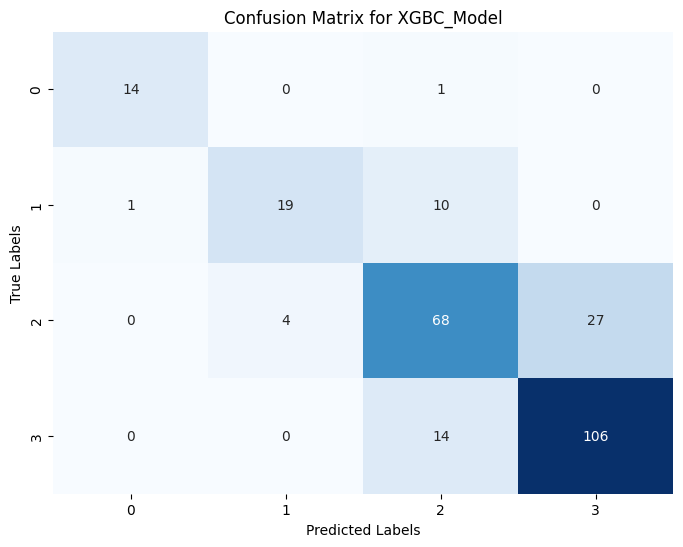

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix for MLP_Model:
[[ 14   0   1   0]
 [  1  19   9   1]
 [  0   4  74  21]
 [  0   2  13 105]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.76      0.63      0.69        30
           2       0.76      0.75      0.76        99
           3       0.83      0.88      0.85       120

    accuracy                           0.80       264
   macro avg       0.82      0.80      0.81       264
weighted avg       0.80      0.80      0.80       264



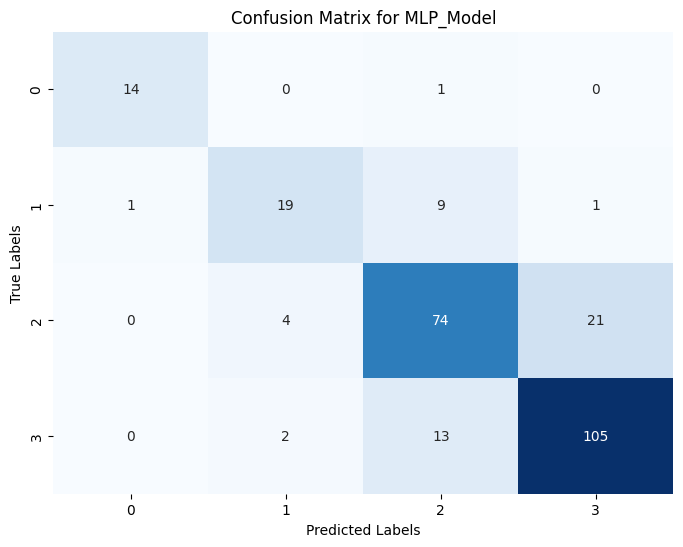

In [516]:
def print_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Nếu y_pred là xác suất hoặc giá trị liên tục, hãy chuyển đổi thành nhãn
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:  # Kiểm tra xem y_pred có chứa xác suất không
        y_pred = np.argmax(y_pred, axis=1)  # Lấy nhãn có xác suất cao nhất

    cm = confusion_matrix(y_test, y_pred)

    print(f'Confusion Matrix for {model_name}:')
    print(cm)
    print(classification_report(y_test, y_pred))

    # Vẽ ma trận dự đoán
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# In ma trận dự đoán cho từng mô hình
print_confusion_matrix(XGBC_Model, X_test, y_test, 'XGBC_Model')
print_confusion_matrix(MLP_Model, X_test, y_test, 'MLP_Model')

In [549]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load dữ liệu
df_final = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_final = df_final.drop(columns=['Unnamed: 0'])
X = df_final.drop(columns=['TB_HK1'])
y = df_final['TB_HK1']

# Load mô hình đã huấn luyện
mlp_model = joblib.load('model/SIU/MLP_Model0.pkl')

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42970142, stratify=y)

# Đảm bảo y_test và y_pred là số nguyên
y_test = y_test.astype(int)

try:
    # Chuyển đổi xác suất thành nhãn nếu mô hình trả về xác suất
    if hasattr(mlp_model, "predict_proba"):
        y_pred = np.argmax(mlp_model.predict_proba(X_test), axis=1)  # Chuyển xác suất thành nhãn
    else:
        y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

    # Kiểm tra định dạng đầu ra
    print("Output format of model prediction:", type(y_pred), "Shape:", y_pred.shape)
    print("Sample predictions:", y_pred[:5])
    print("Sample true labels:", y_test.head())

    # Xác minh kiểu dữ liệu đầu ra
    print(f"Type of y_test: {type(y_test)}")
    print(f"Type of y_pred: {type(y_pred)}")

    # Tính toán feature importance
    result = permutation_importance(
        mlp_model,
        X_test,
        y_test.to_numpy(),  # Đảm bảo y_test là NumPy array
        scoring='accuracy',
        n_repeats=10,
        random_state=42
    )

    # Tạo DataFrame cho feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)

    # Vẽ biểu đồ feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for MLP Model')
    plt.gca().invert_yaxis()  # Đảo ngược trục y để dễ đọc
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error during feature importance calculation or plotting: {e}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Output format of model prediction: <class 'numpy.ndarray'> Shape: (264,)
Sample predictions: [3 1 2 2 2]
Sample true labels: 499    3
329    2
429    2
163    2
202    2
Name: TB_HK1, dtype: int32
Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Error during feature importance calculation or plotting: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets


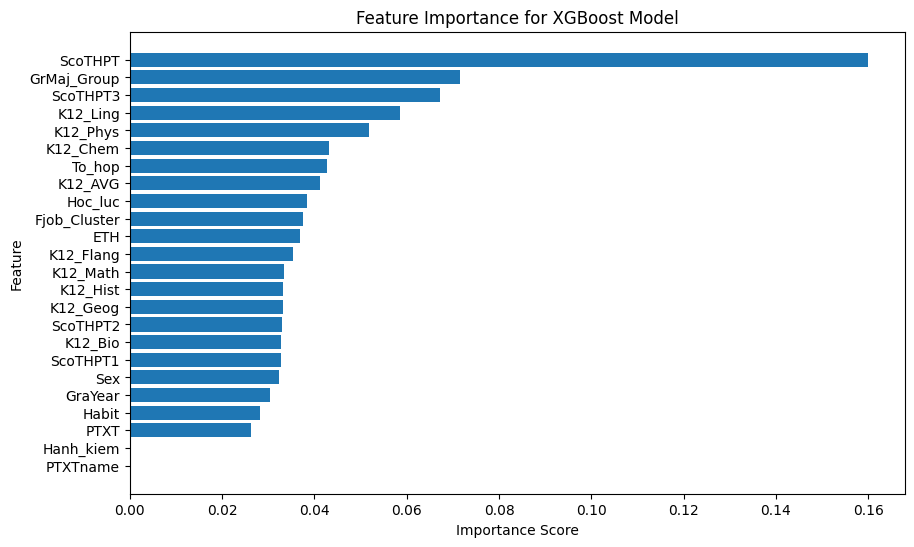

In [550]:
# Retrieve and plot feature importance
import matplotlib.pyplot as plt
import pandas as pd

# Assuming XGBC_Model is your trained model and X_train has feature names
feature_importances = XGBC_Model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance for XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  0%|          | 0/264 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

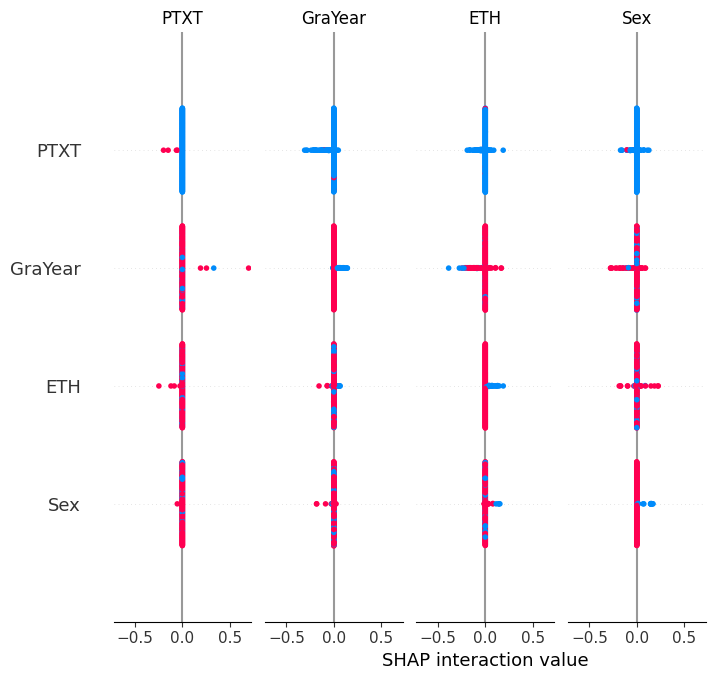

In [562]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load the best-trained model
best_model = tf.keras.models.load_model("model/SIU/MLP_Model1.h5")

# Convert the dataset to a format compatible with SHAP
X_test_np = X_test.to_numpy() if not isinstance(X_test, np.ndarray) else X_test

# Create a SHAP explainer
explainer = shap.KernelExplainer(best_model.predict, shap.sample(X_train, 1))  # Sampling to speed up SHAP calculations

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_np)

# Plot the feature importance (summary plot)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

shap.summary_plot(shap_values, X_test_np, feature_names=feature_names, plot_type="bar")


In [564]:
# Load the trained model
model_path = "model/SIU/MLP_Model1.h5"
best_model = tf.keras.models.load_model(model_path)

# Predict labels using the model
y_pred = np.argmax(best_model.predict(X_test), axis=1)

# Combine predictions and features into a DataFrame
results_df = pd.DataFrame(X_test, columns=X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])])
results_df['Predicted_Label'] = y_pred

# Calculate correlation between features and predicted labels
correlation_matrix = results_df.corr()
correlation_with_labels = correlation_matrix['Predicted_Label'].sort_values(ascending=False)

# Prepare data for plotting
feature_names = correlation_with_labels.index.drop('Predicted_Label')
correlation_values = correlation_with_labels.drop('Predicted_Label').values

# Create a Plotly bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=feature_names,
    y=correlation_values,
    marker_color='steelblue',
    text=[f"{value:.2f}" for value in correlation_values],
    textposition='outside'
))

# Customize the layout
fig.update_layout(
    title="Correlation of Features with Predicted Labels",
    xaxis_title="Features",
    yaxis_title="Correlation Coefficient",
    xaxis_tickangle=45,
    height=600,
    width=1000,
    template="plotly_white"
)

# Show the chart
fig.show()
# Print the correlation for further inspection
print(correlation_with_labels)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Predicted_Label    1.000000
ScoTHPT            0.693742
K12_Ling           0.425060
ETH                0.382872
ScoTHPT3           0.363342
K12_Phys           0.336580
K12_Math           0.336564
K12_Hist           0.331376
K12_Chem           0.327045
K12_AVG            0.283605
K12_Geog           0.266585
Sex                0.261954
ScoTHPT1           0.252603
K12_Flang          0.215563
K12_Bio            0.188841
Hoc_luc            0.182183
ScoTHPT2           0.163190
GrMaj_Group        0.162143
Fjob_Cluster       0.151410
PTXTname           0.091939
Habit              0.088750
To_hop             0.085121
Hanh_kiem          0.052536
GraYear            0.028008
PTXT              -0.129395
Name: Predicted_Label, dtype: float64
